In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For creating plots

# Import metrics from scikit-learn
from sklearn.metrics import mean_absolute_error, mean_squared_error  # For evaluation metrics
from sklearn.metrics import r2_score  # For R-squared score calculation

In [2]:
# This code reads data from a CSV file named "Material Compressive Strength Experimental Data.csv"
# and stores it in a pandas DataFrame named 'df'.
file_name = "Material Compressive Strength Experimental Data.csv"
df = pd.read_csv(file_name)

In [3]:
df

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
0                     486.42                  180.60               21.26   
1                     133.32                  260.14              185.60   
2                     559.97                    2.84              111.76   
3                     391.43                  351.05               76.39   
4                     394.78                  352.61              194.35   
...                      ...                     ...                 ...   
6134                  188.78                  162.30              142.65   
6135                  349.87                  291.45               77.82   
6136                  358.29                   22.70               17.99   
6137                  445.25                  275.59              178.86   
6138                  560.23                  266.56              167.14   

      Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  \
0             201.66             16.11              1151.17   
1             175.99              6.27              1090.57   
2             295.23             11.95              1024.93   
3             299.14             19.00              1134.88   
4             235.54             17.02              1098.24   
...              ...               ...                  ...   
6134          163.66             15.98              1003.82   
6135          188.26             25.82               925.10   
6136          208.58             34.91              1081.07   
6137          191.77             18.07               865.15   
6138          175.49             10.63              1165.87   

      Refined Aggregator  Formulation Duration (hrs)  Compression Strength MPa  
0                 708.50                      344.43                     79.89  
1                1010.25                       28.86                     59.80  
2                 810.69                      237.68                     77.86  
3                 881.34                      208.81                     71.74  
4                 781.01                      266.84                     76.07  
...                  ...                         ...                       ...  
6134             1002.47                      357.91                     50.61  
6135             1005.31                      104.20                     54.24  
6136              792.44                      302.76                     56.57  
6137              833.10                      374.63                     58.21  
6138              894.53                      360.96                     58.96  

[6139 rows x 9 columns]

In [4]:
# Displaying information about the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6139 entries, 0 to 6138
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Material Quantity (gm)      6030 non-null   float64
 1   Additive Catalyst (gm)      6030 non-null   float64
 2   Ash Component (gm)          6030 non-null   float64
 3   Water Mix (ml)              6030 non-null   float64
 4   Plasticizer (gm)            6030 non-null   float64
 5   Moderate Aggregator         6030 non-null   float64
 6   Refined Aggregator          6030 non-null   float64
 7   Formulation Duration (hrs)  6030 non-null   float64
 8   Compression Strength MPa    6139 non-null   float64
dtypes: float64(9)
memory usage: 431.8 KB


In [5]:
# Generating descriptive statistics of the DataFrame 'df'
df.describe()

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
count             6030.000000             6030.000000         6030.000000   
mean               383.642297              196.699846          111.856252   
std                149.994316              133.329220           74.241117   
min                124.440000                0.000000            0.000000   
25%                256.030000               78.210000           44.582500   
50%                377.405000              192.320000          115.250000   
75%                511.522500              307.650000          174.257500   
max                658.800000              438.470000          244.120000   

       Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  \
count     6030.000000       6030.000000          6030.000000   
mean       224.296955         17.651085           998.669332   
std         41.545751         11.687965            97.732677   
min        148.600000          0.000000           821.540000   
25%        190.387500          7.922500           918.437500   
50%        225.700000         16.345000           997.985000   
75%        257.447500         27.667500          1079.827500   
max        301.340000         39.280000          1174.360000   

       Refined Aggregator  Formulation Duration (hrs)  \
count         6030.000000                 6030.000000   
mean           811.832398                  174.408504   
std            112.813539                  112.415173   
min            609.230000                   16.250000   
25%            717.447500                   70.300000   
50%            810.260000                  163.105000   
75%            905.857500                  272.602500   
max           1018.050000                  380.250000   

       Compression Strength MPa  
count               6139.000000  
mean                  56.851430  
std                   16.124932  
min                    2.610000  
25%                   47.085000  
50%                   59.790000  
75%                   69.845000  
max                   92.510000

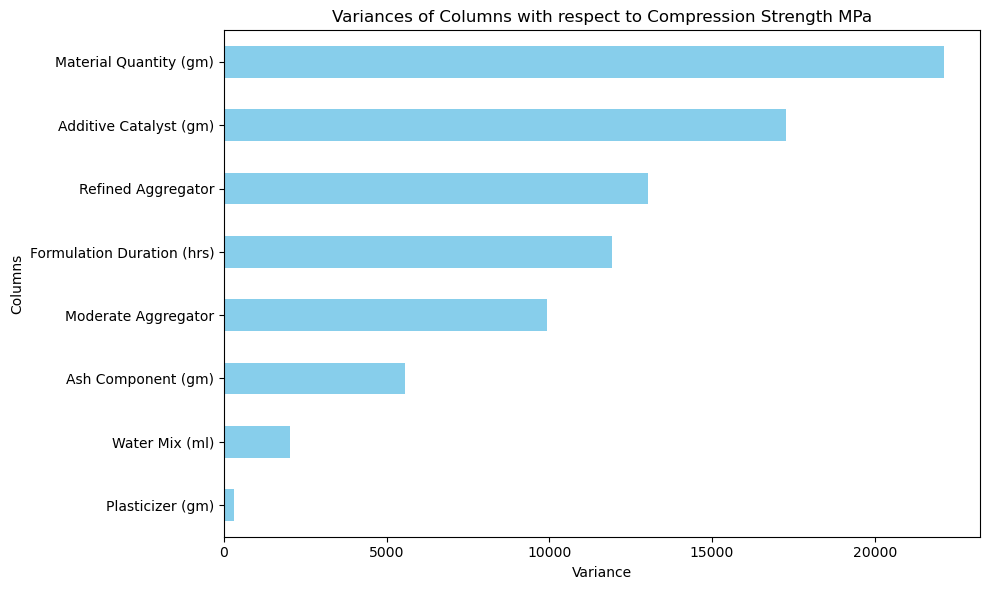

In [6]:
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating plots

# Define the reference column for variance comparison
reference_column = 'Compression Strength MPa'

# Calculate variances of columns with respect to the reference column
variances = {}
for col in df.columns:
    if col != reference_column:
        variances[col] = df[col].sub(df['Compression Strength MPa']).var()

# Convert variances to a pandas Series
variances_series = pd.Series(variances)

# Plotting the variances of columns compared to the reference column
plt.figure(figsize=(10, 6))
variances_series.sort_values().plot(kind='barh', color='skyblue')
plt.title(f'Variances of Columns with respect to {reference_column}')
plt.xlabel('Variance')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()

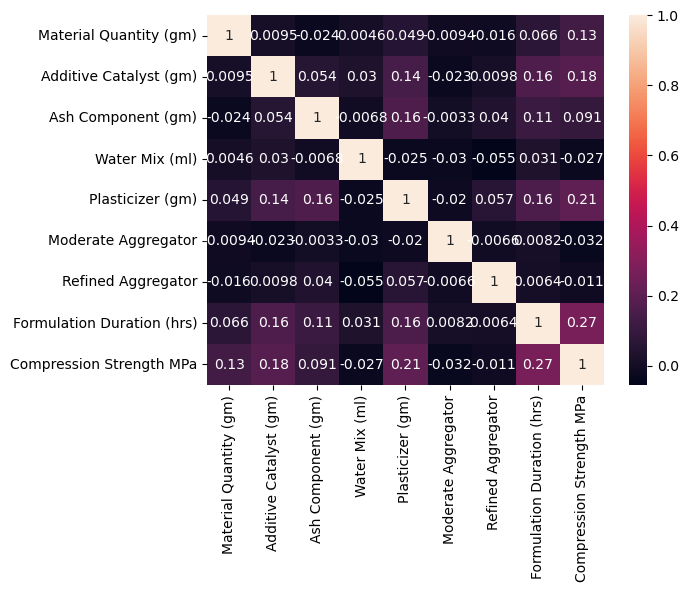

In [7]:
# Create a heatmap to visualize the correlation matrix of the DataFrame 'df'
sns.heatmap(df.corr(), annot=True)  # Display correlation values as annotations
plt.show()

In [8]:
# Accessing the column names of the DataFrame 'df'
df.columns

Index(['Material Quantity (gm)', 'Additive Catalyst (gm)',
       'Ash Component (gm)', 'Water Mix (ml)', 'Plasticizer (gm)',
       'Moderate Aggregator', 'Refined Aggregator',
       'Formulation Duration (hrs)', 'Compression Strength MPa'],
      dtype='object')

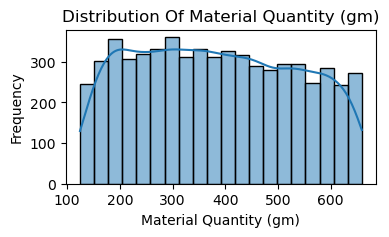

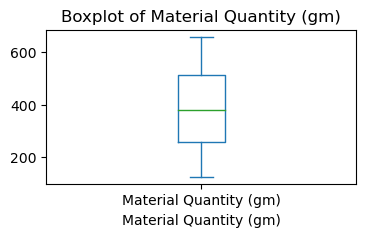

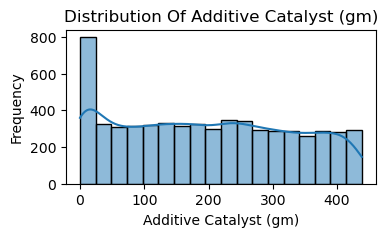

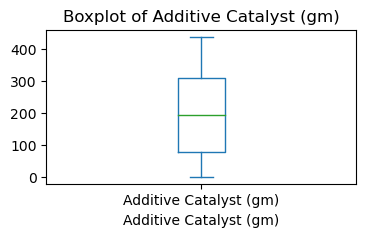

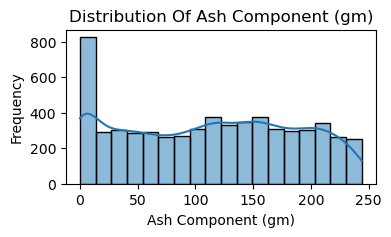

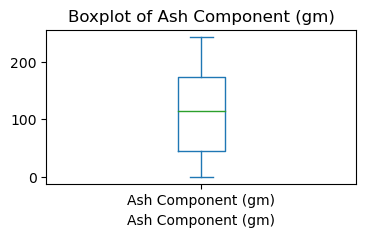

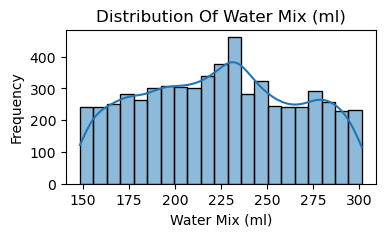

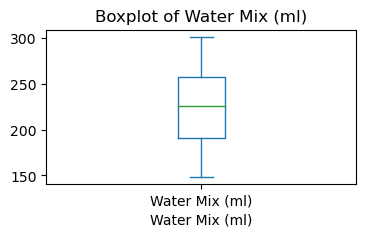

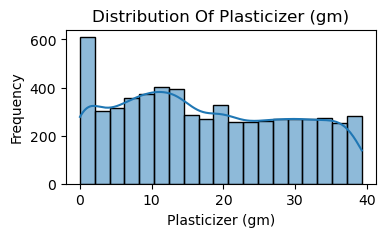

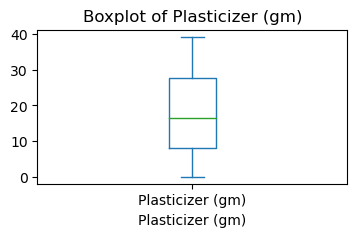

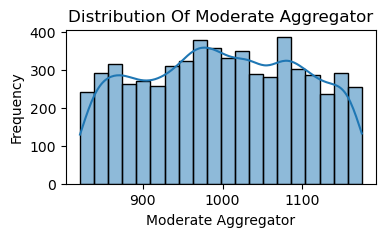

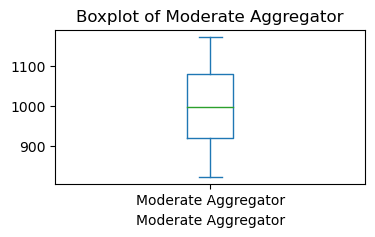

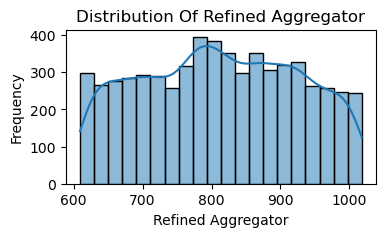

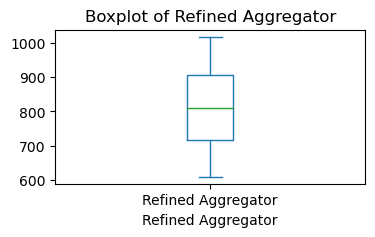

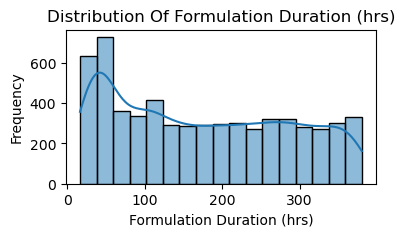

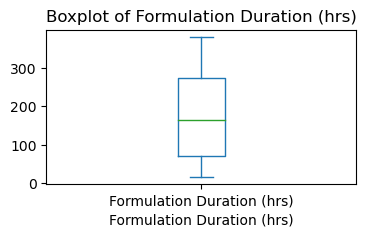

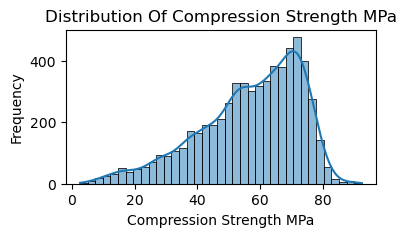

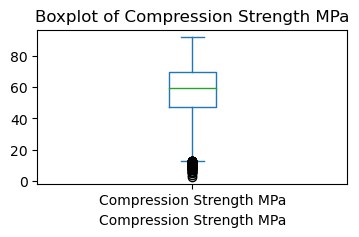

In [15]:
# List of columns to visualize
columns_to_plot = [
    'Material Quantity (gm)',
    'Additive Catalyst (gm)',
    'Ash Component (gm)',
    'Water Mix (ml)',
    'Plasticizer (gm)',
    'Moderate Aggregator',
    'Refined Aggregator',
    'Formulation Duration (hrs)',
    'Compression Strength MPa'
]

# Loop through each column for visualization
for column in columns_to_plot:
    # Distribution plot with KDE
    plt.figure(figsize=(4, 2))  # Adjusting the size of the plot
    sns.histplot(df[column], kde=True)
    plt.xlabel(column)  # Using the column name as x-axis label
    plt.ylabel("Frequency")
    plt.title(f"Distribution Of {column}")  # Setting plot title
    plt.show()  # Displaying the histogram

    # Box plot
    plt.figure(figsize=(4, 2))  # Adjusting the size of the plot
    df[column].plot(kind='box')
    plt.xlabel(column)  # Using the column name as x-axis label
    plt.title(f"Boxplot of {column}")  # Setting plot title
    plt.show()  # Displaying the box plot

In [16]:
# Function to remove outliers using IQR method and replace the column
def remove_outliers_replace(column, lower_multiplier=1.5, upper_multiplier=1.5):
    Q1 = column.quantile(0.25)  # Calculating the first quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Calculating the third quartile (75th percentile)
    IQR = Q3 - Q1  # Calculating the Interquartile Range (IQR)
    lower_bound = Q1 - lower_multiplier * IQR  # Calculating the lower bound
    upper_bound = Q3 + upper_multiplier * IQR  # Calculating the upper bound
    return column.apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else None)  # Applying the IQR method

# Adjusting the threshold values by modifying the multipliers
lower_threshold = 1.0  # Lower threshold multiplier
upper_threshold = 2.0  # Upper threshold multiplier

# Remove outliers from 'Compression Strength MPa' column
# Replace outliers with modified values using adjusted threshold values
df['Compression Strength MPa'] = remove_outliers_replace(df['Compression Strength MPa'], lower_threshold, upper_threshold)

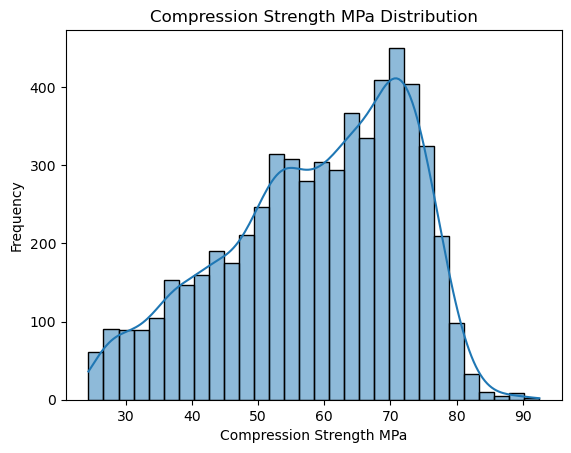

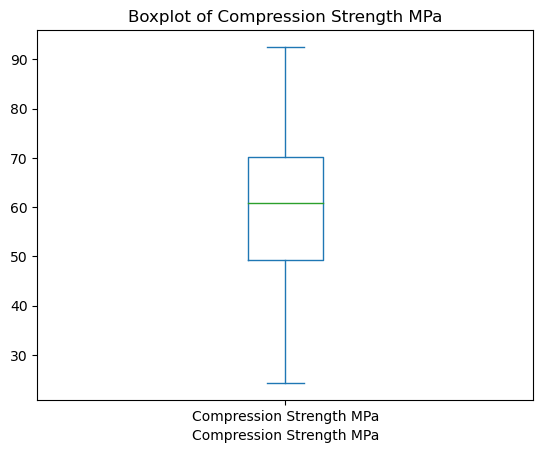

In [17]:
# Visualizing distribution using a histogram with KDE for 'Compression Strength MPa'
sns.histplot(df['Compression Strength MPa'], kde=True)
plt.xlabel("Compression Strength MPa")  # Labeling x-axis
plt.ylabel("Frequency")  # Labeling y-axis
plt.title("Compression Strength MPa Distribution")  # Setting plot title
plt.show()  # Displaying the histogram

# Creating a box plot for 'Compression Strength MPa'
df['Compression Strength MPa'].plot(kind='box')
plt.xlabel("Compression Strength MPa")  # Labeling x-axis
plt.title("Boxplot of Compression Strength MPa")  # Setting plot title
plt.show()  # Displaying the box plot

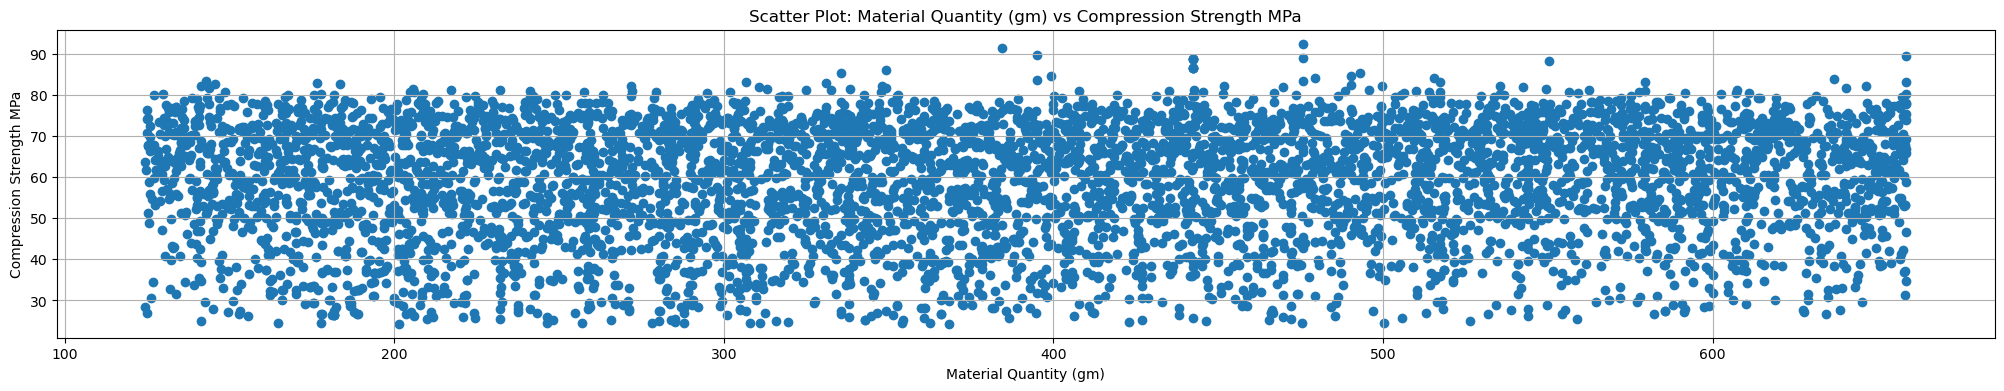

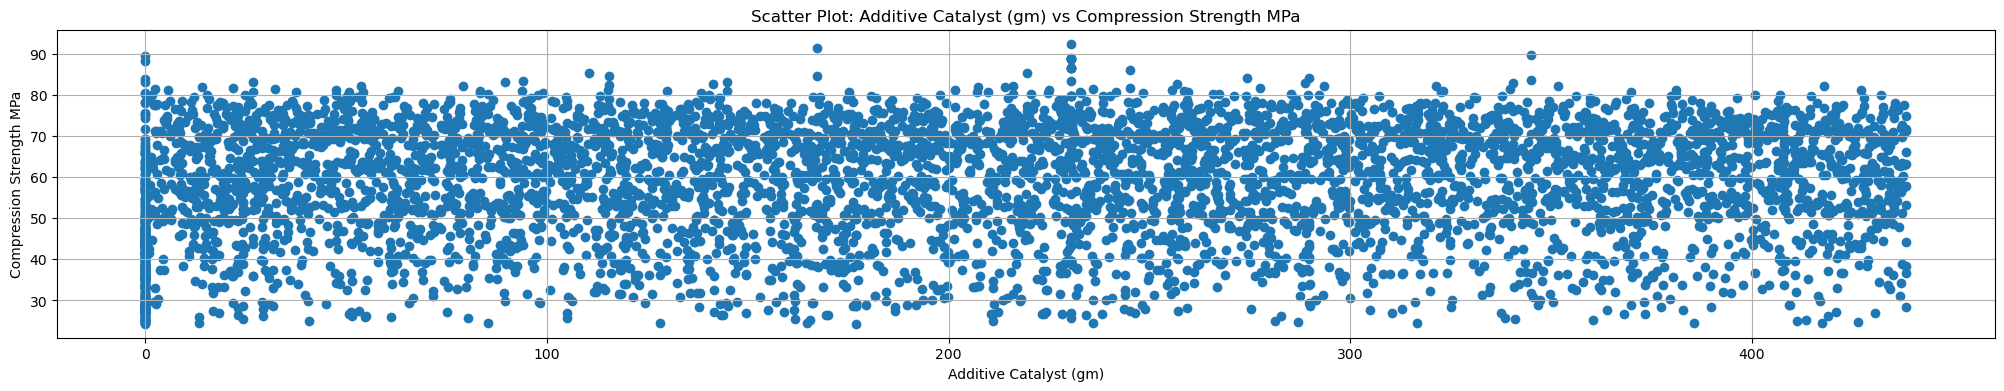

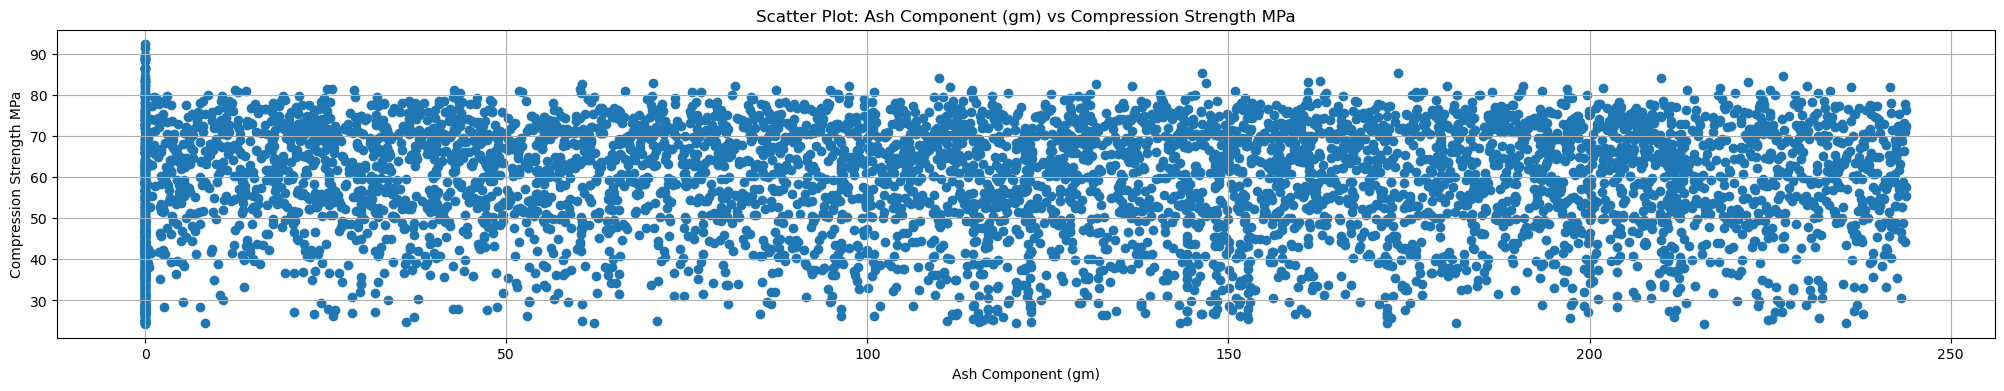

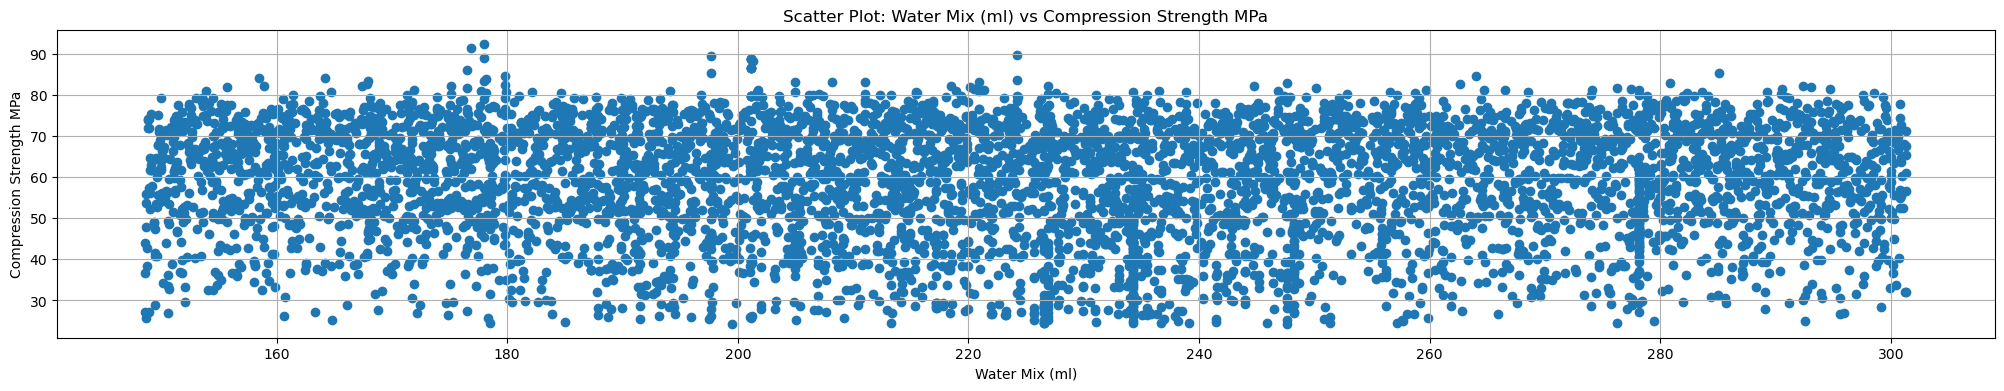

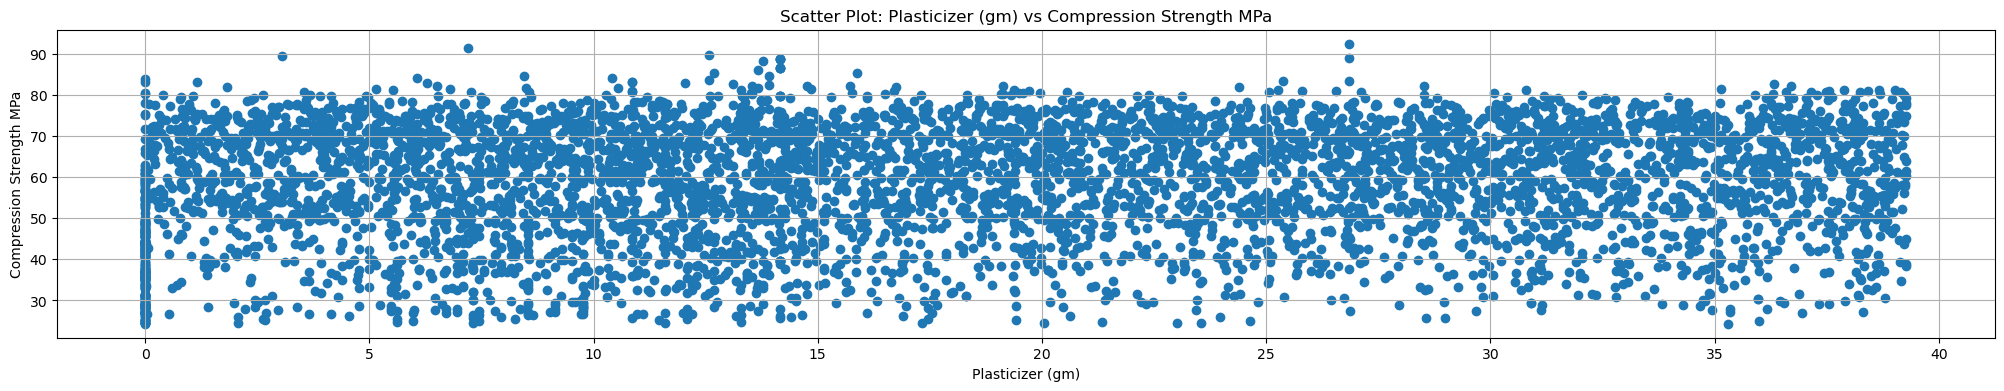

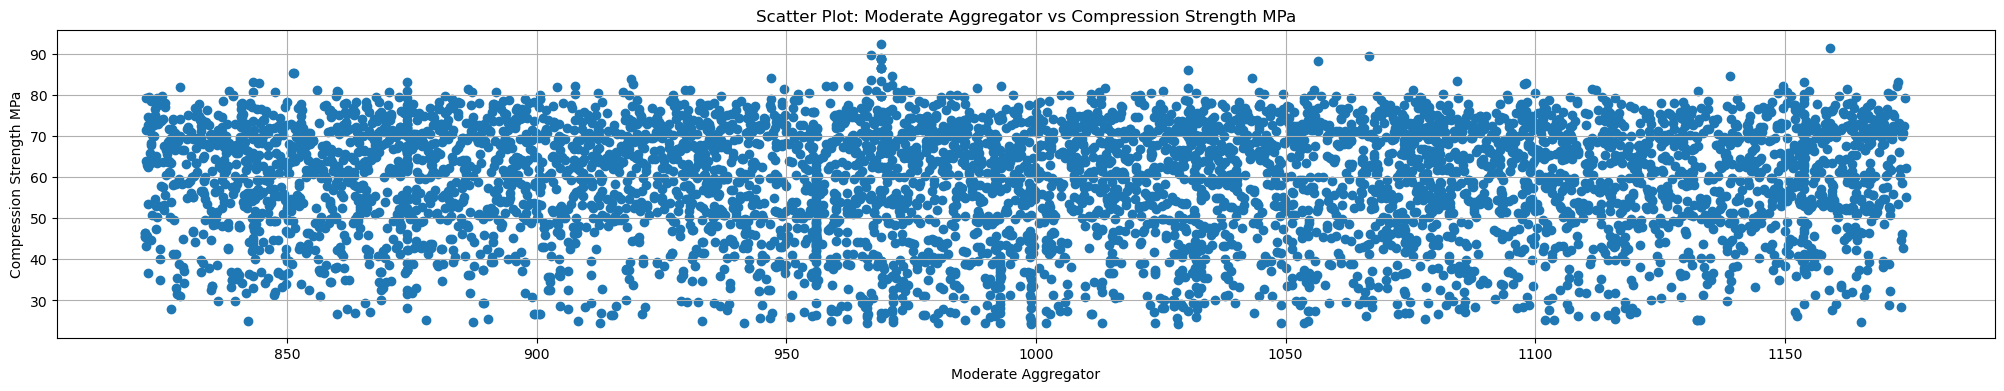

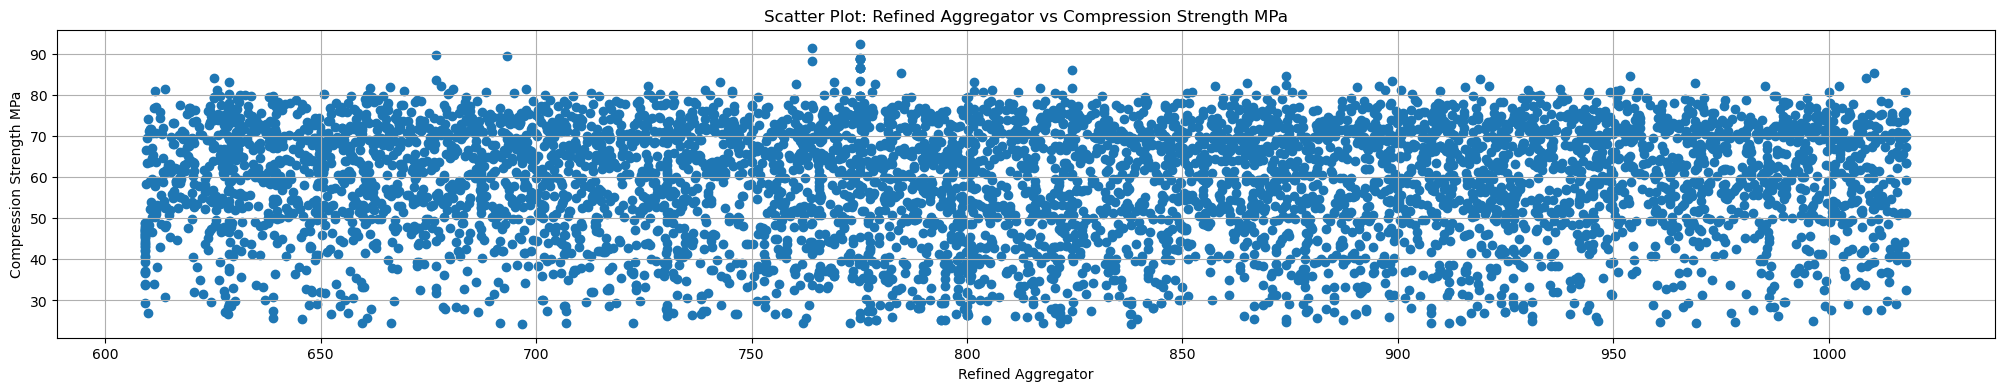

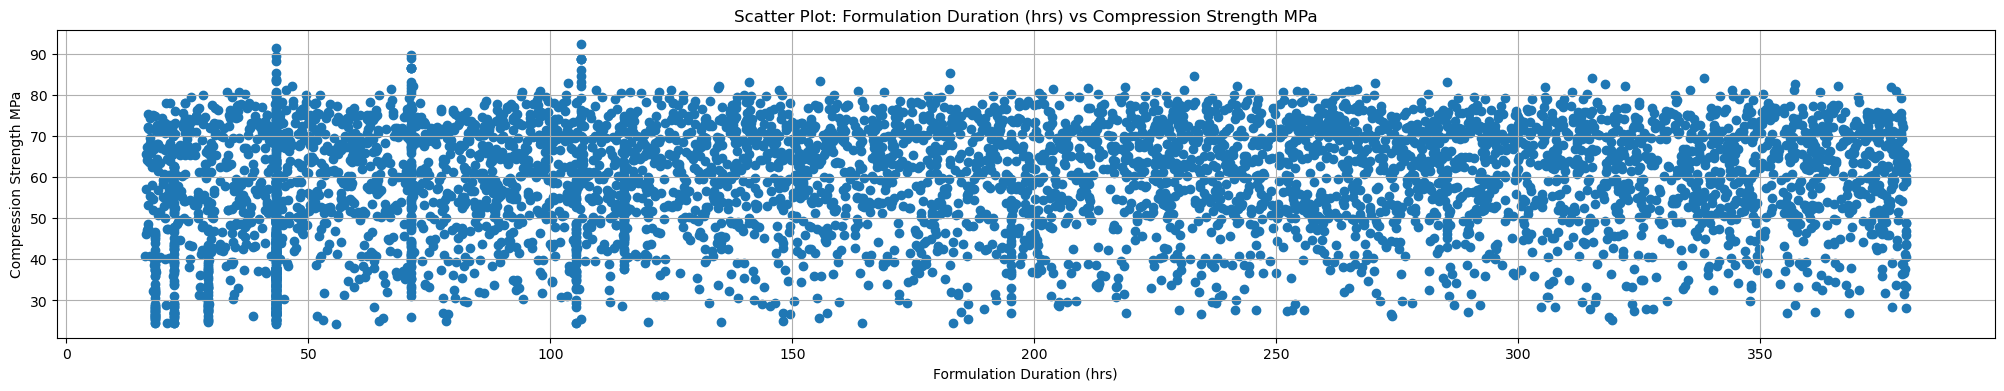

In [23]:
# Selecting 8 columns for scatter plots
columns_for_scatter = ['Material Quantity (gm)', 'Additive Catalyst (gm)', 'Ash Component (gm)', 'Water Mix (ml)', 'Plasticizer (gm)', 'Moderate Aggregator', 'Refined Aggregator', 'Formulation Duration (hrs)']

# Column to be plotted against (change 'Column9' to your 9th column name)
column_against = 'Compression Strength MPa'

# Loop through each pair of columns for scatter plots
for col in columns_for_scatter:
    plt.figure(figsize=(25, 4))  # Setting the size of the plot
    plt.scatter(df[col], df[column_against])  # Creating a scatter plot
    plt.title(f'Scatter Plot: {col} vs {column_against}')  # Setting the plot title
    plt.xlabel(col)  # Labeling x-axis
    plt.ylabel(column_against)  # Labeling y-axis
    plt.grid(True)  # Showing gridlines
    plt.show()  # Displaying the scatter plot

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\3612558274.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=False)  # Creating a density plot


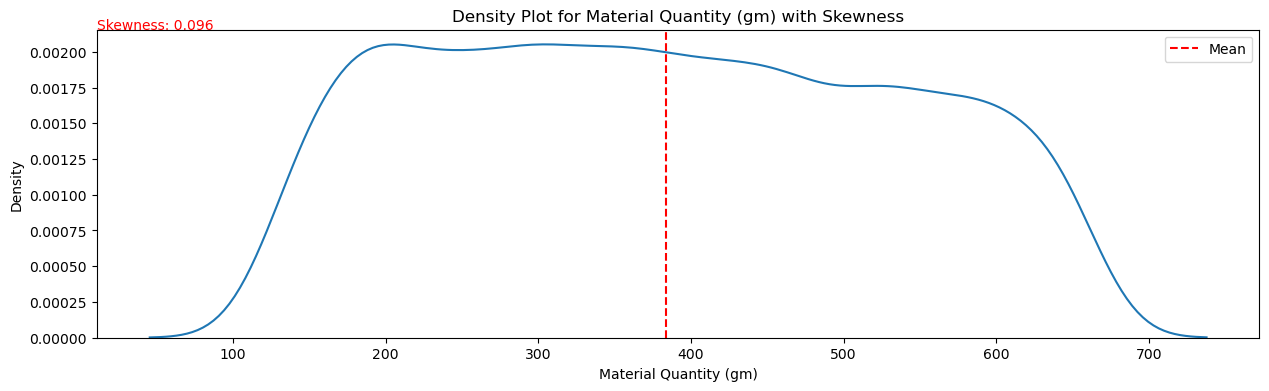

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\3612558274.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=False)  # Creating a density plot


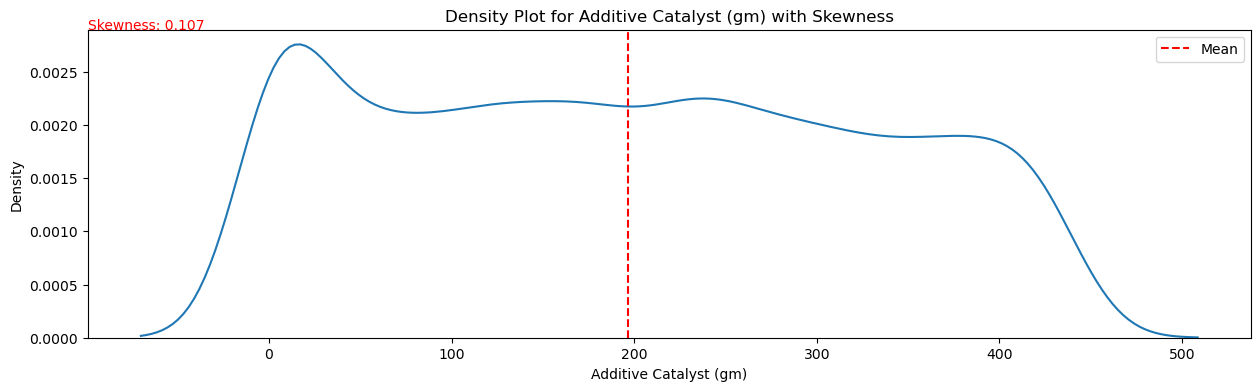

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\3612558274.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=False)  # Creating a density plot


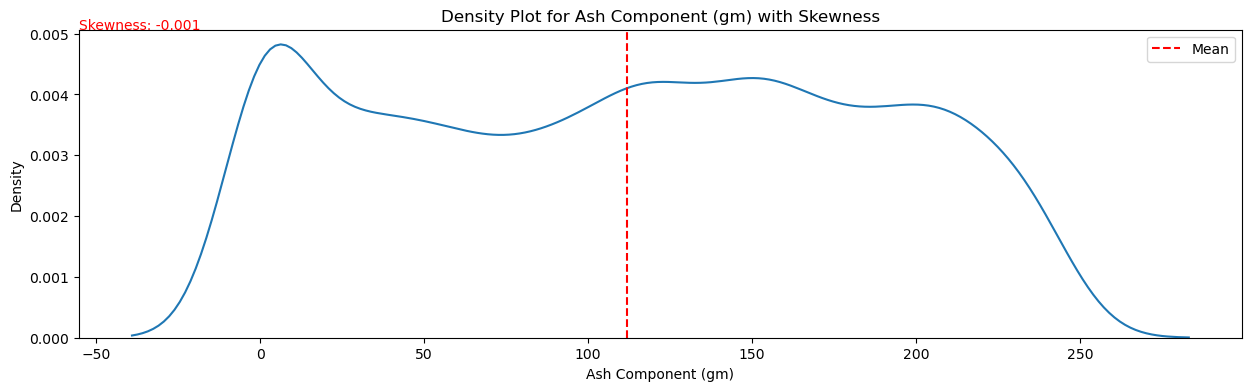

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\3612558274.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=False)  # Creating a density plot


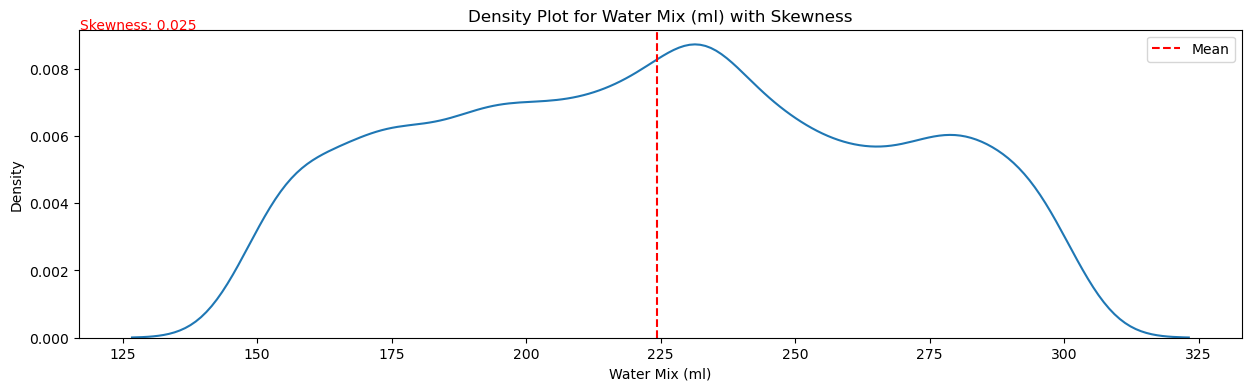

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\3612558274.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=False)  # Creating a density plot


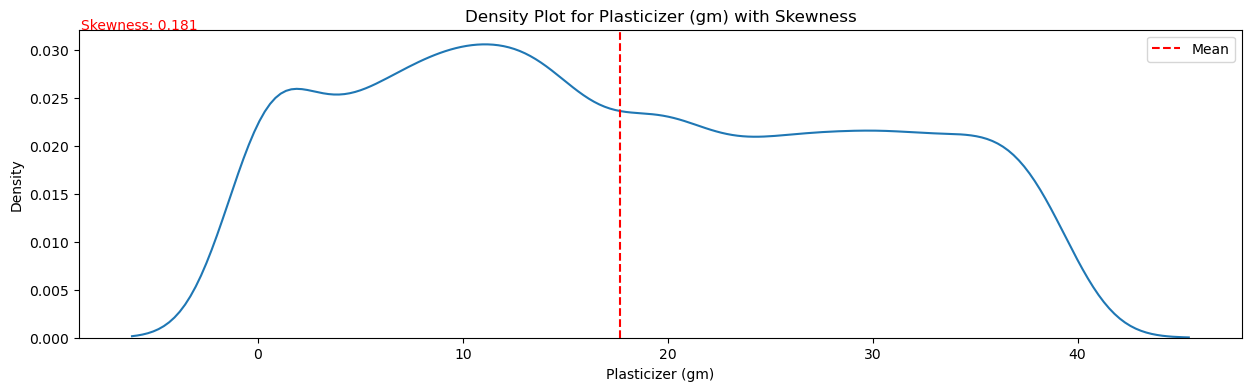

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\3612558274.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=False)  # Creating a density plot


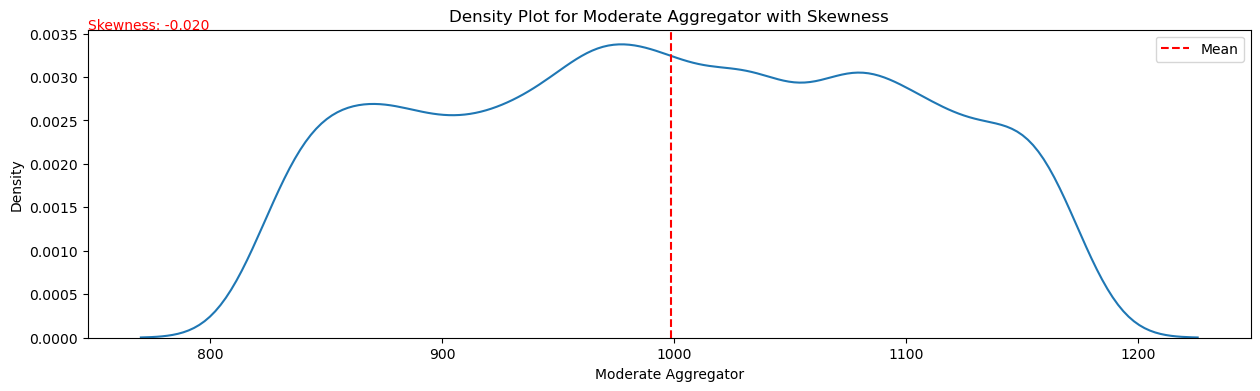

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\3612558274.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=False)  # Creating a density plot


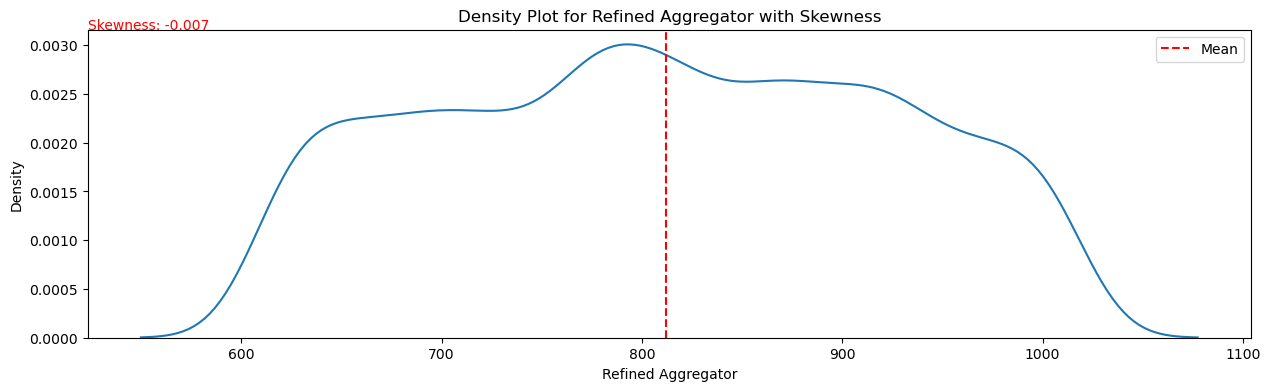

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\3612558274.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=False)  # Creating a density plot


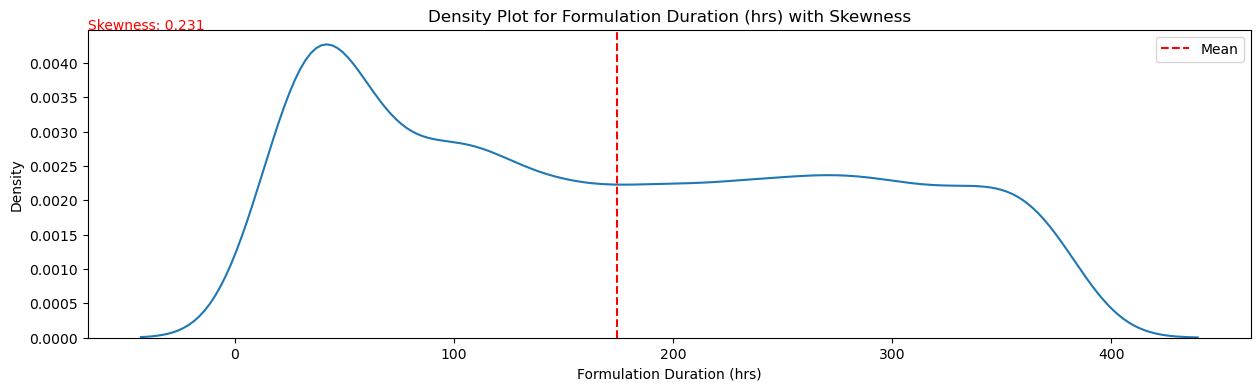

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\3612558274.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=False)  # Creating a density plot


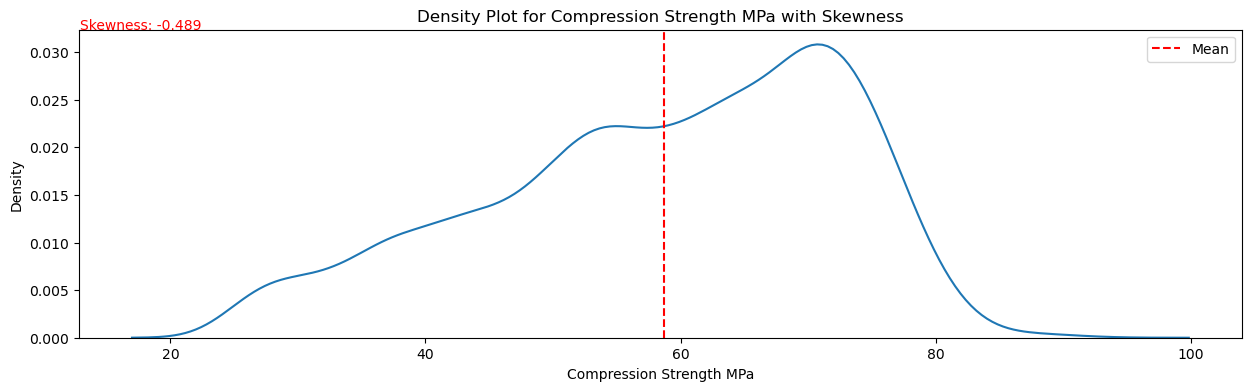

In [26]:
# Consider df as your DataFrame with 9 columns to visualize
columns_to_plot = df.columns[:9]  # Assuming you want to visualize the first 9 columns

# Loop through each column for visualization
for column in columns_to_plot:
    skewness_value = df[column].skew()  # Calculating skewness for the column

    # Create a density plot to visualize the distribution
    plt.figure(figsize=(15, 4))  # Setting the size of the plot
    sns.kdeplot(df[column], shade=False)  # Creating a density plot
    plt.title(f'Density Plot for {column} with Skewness')  # Setting the plot title
    plt.xlabel(column)  # Labeling x-axis
    plt.ylabel('Density')  # Labeling y-axis

    # Mark skewness value on the plot
    plt.text(plt.xlim()[0] + 0.1, plt.ylim()[1] - 0.00000005, f'Skewness: {skewness_value:.3f}', fontsize=10, color='red')  # Adding skewness value as text on the plot
    plt.axvline(x=df[column].mean(), color='red', linestyle='--', label='Mean')  # Plotting a dashed line for the mean

    plt.legend()  # Showing legend
    plt.show()  # Displaying the plot

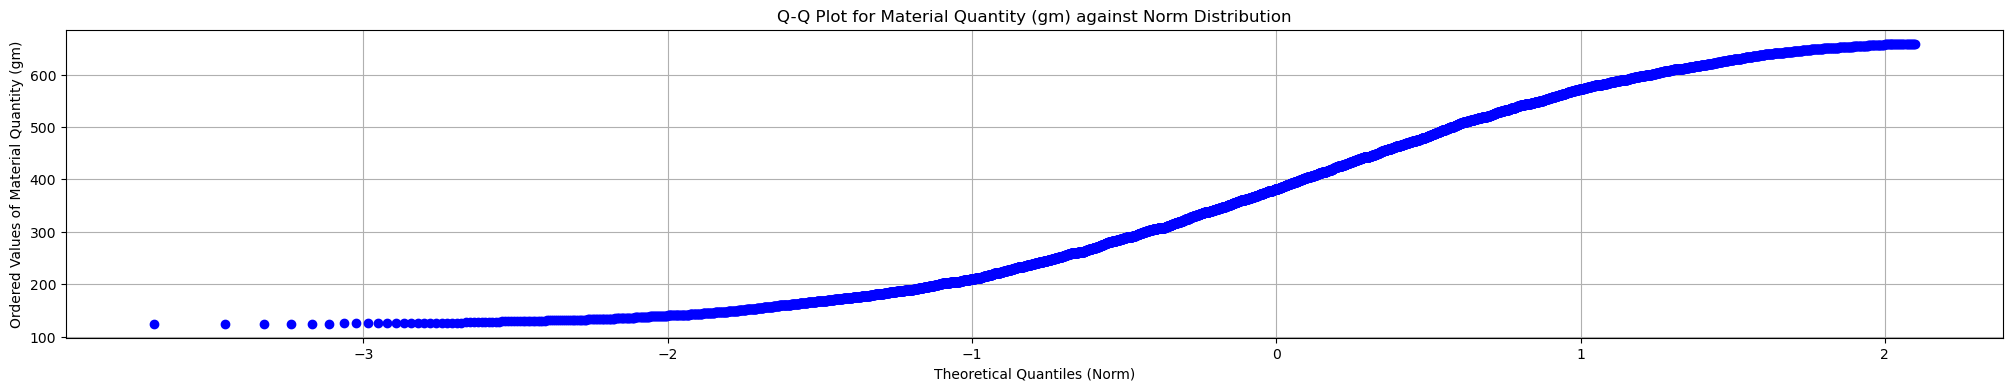

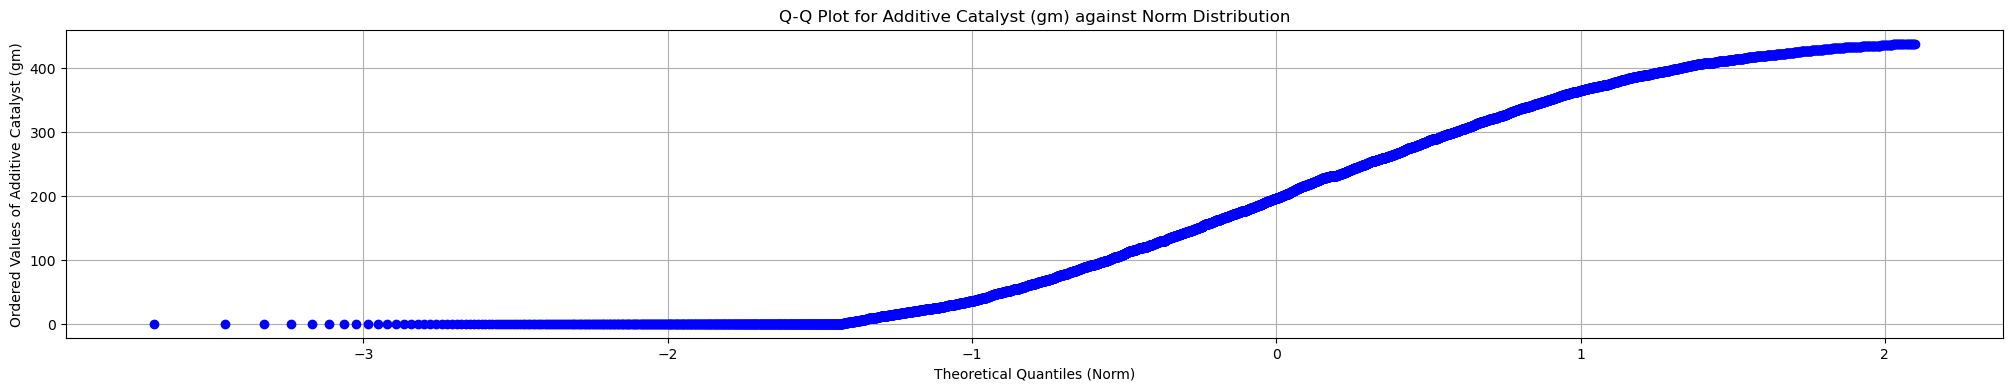

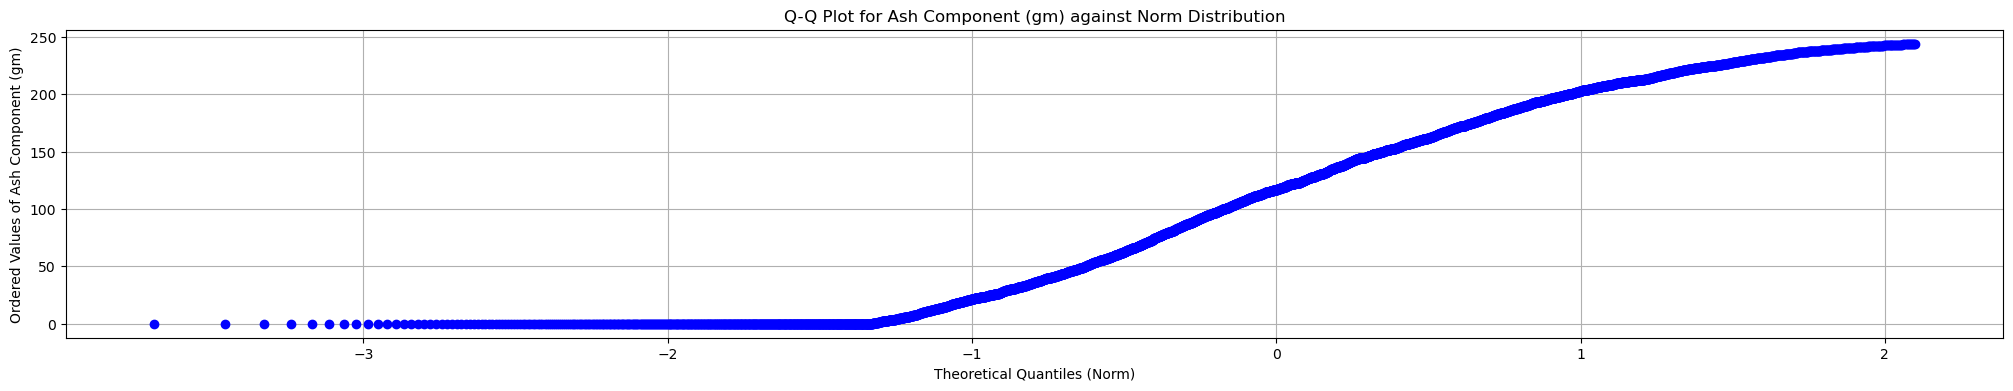

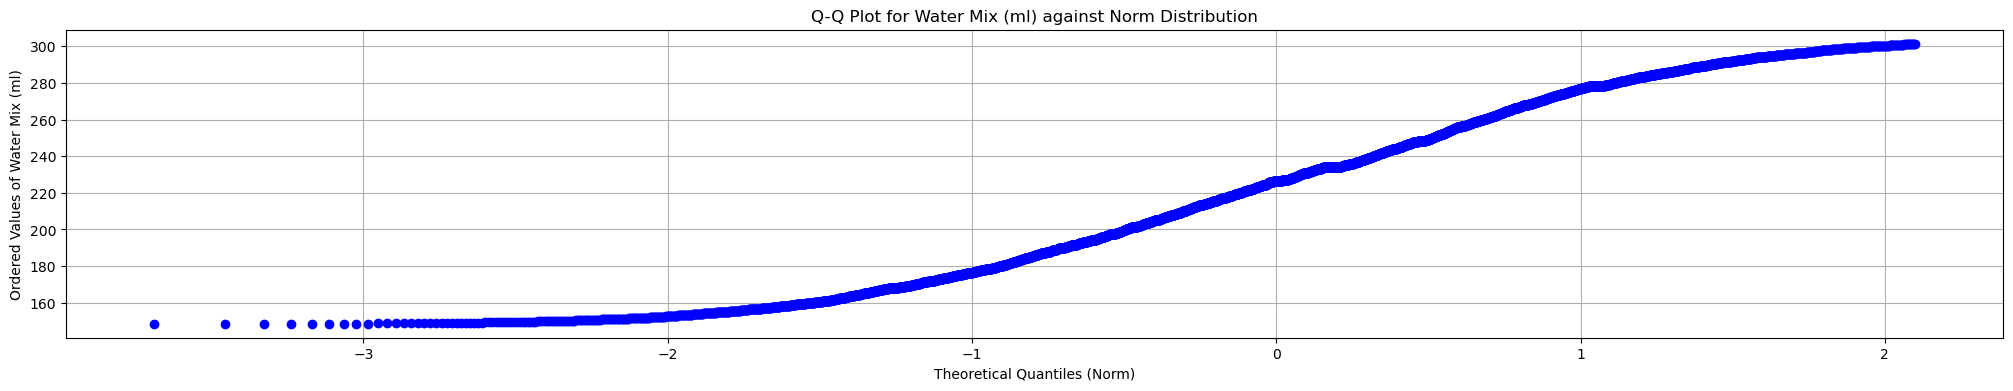

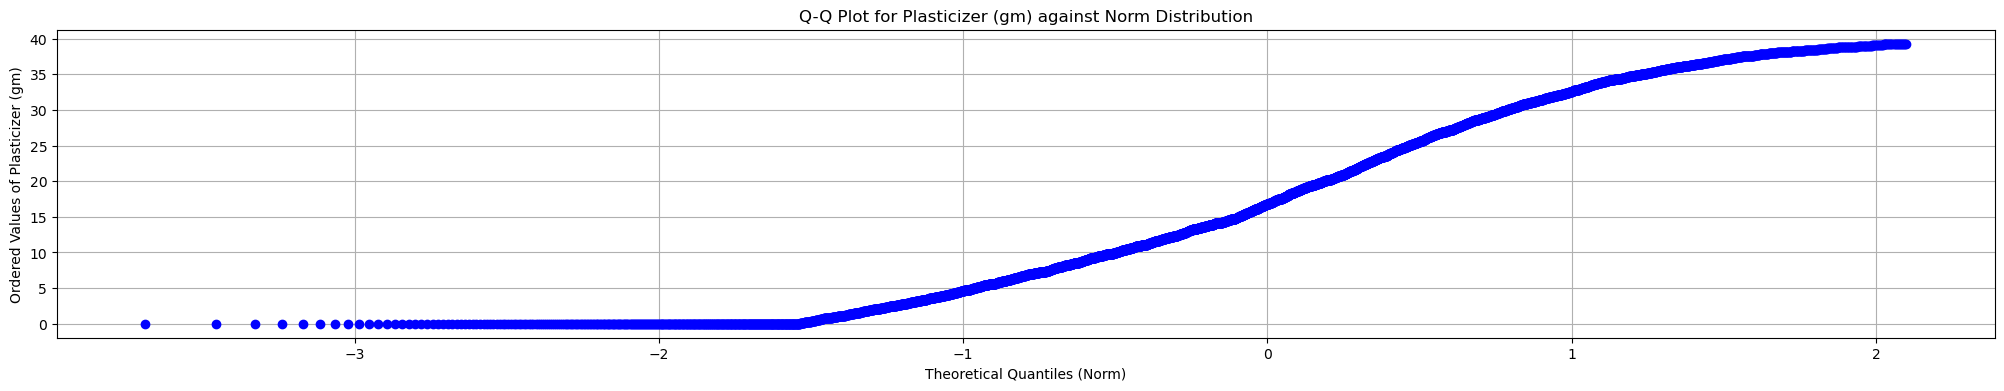

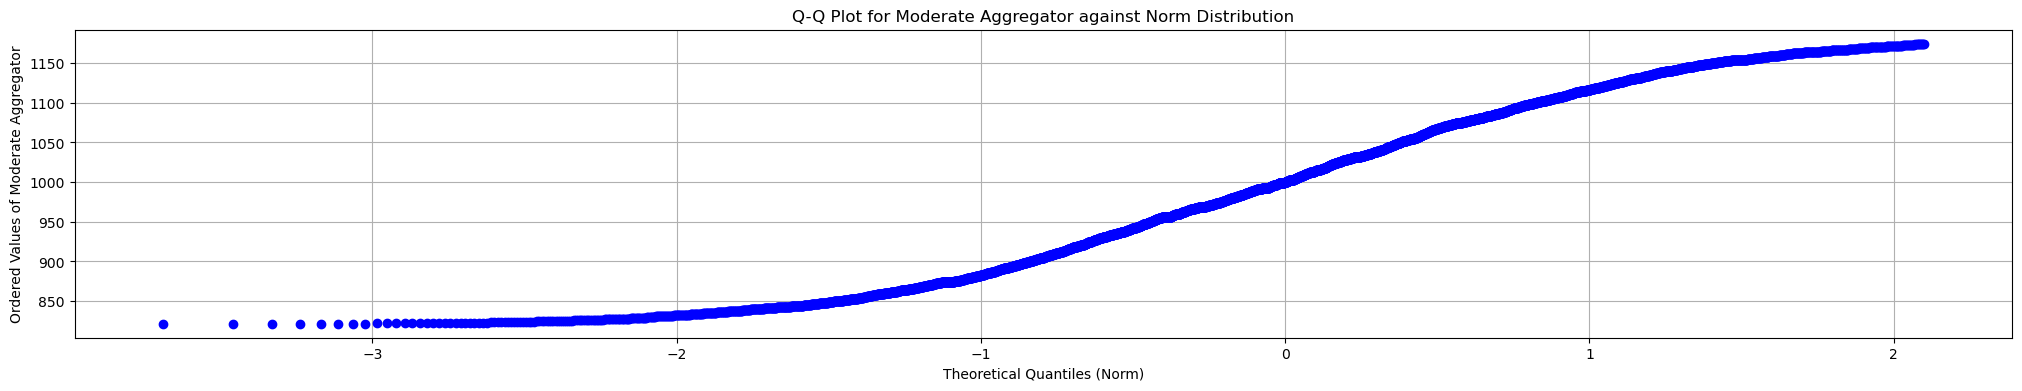

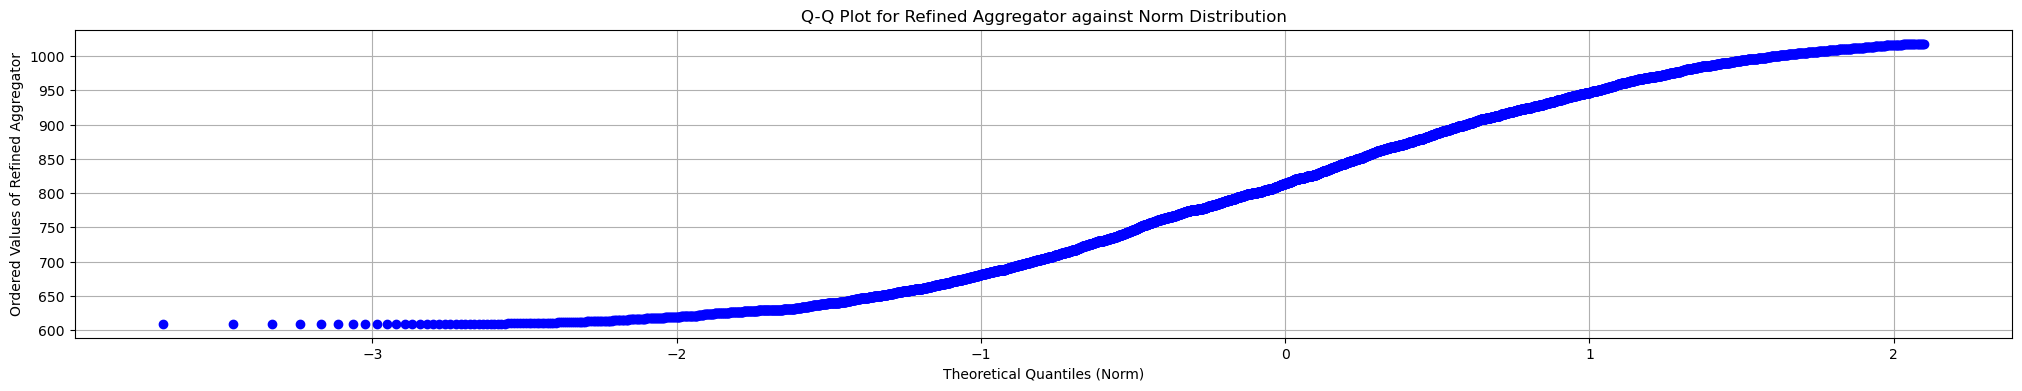

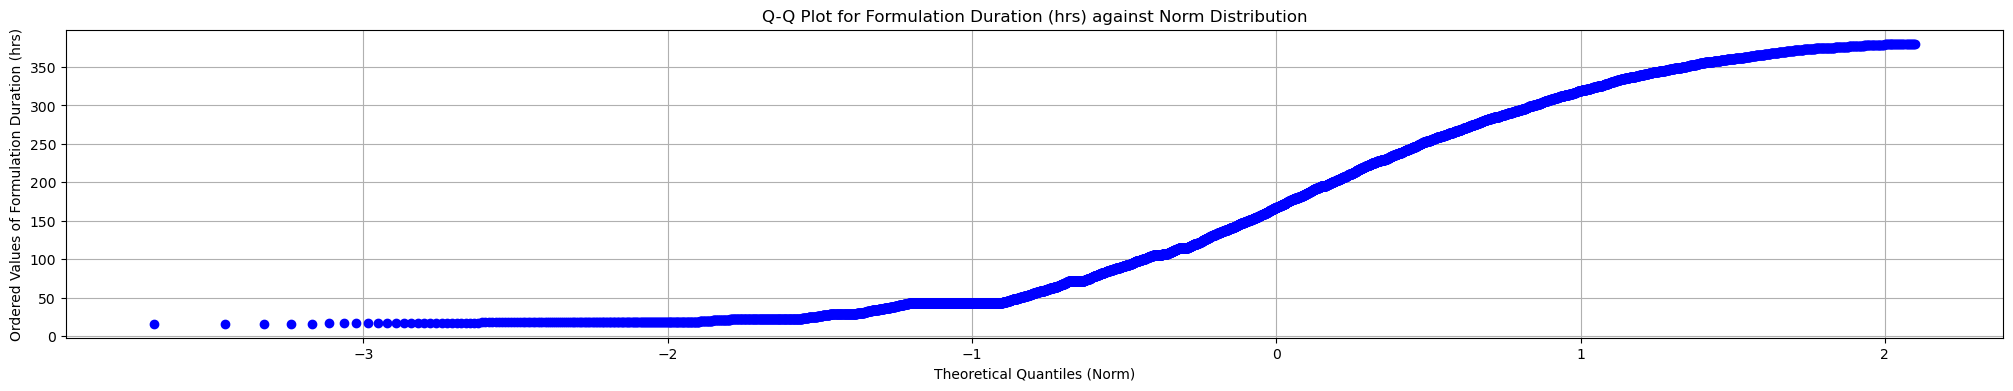

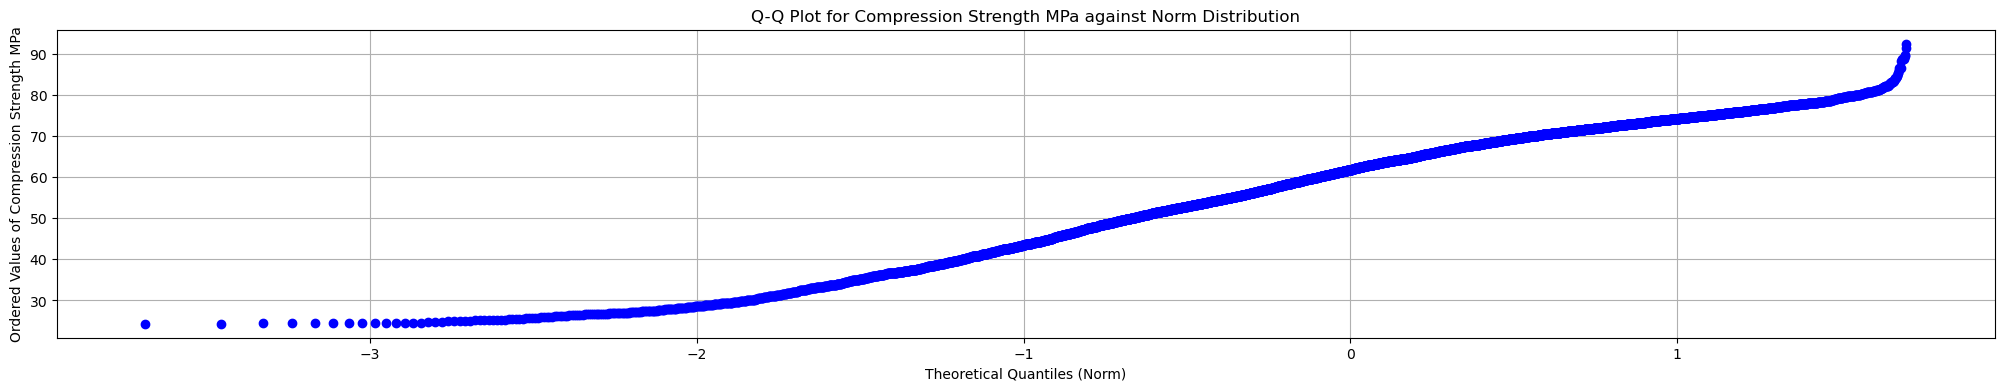

In [37]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import scipy.stats as stats  # Importing scipy.stats for probability plots
import pandas as pd  # Importing pandas for data manipulation and analysis

# Assuming df contains your DataFrame with 8 columns

# Selecting 8 columns for Q-Q plots
columns_for_qq = ['Material Quantity (gm)', 'Additive Catalyst (gm)', 'Ash Component (gm)', 'Water Mix (ml)', 'Plasticizer (gm)', 'Moderate Aggregator', 'Refined Aggregator', 'Formulation Duration (hrs)', 'Compression Strength MPa']

# Define the reference distribution (e.g., 'norm' for normal distribution)
reference_distribution = 'norm'

# Loop through each column for Q-Q plots
for col in columns_for_qq:
    plt.figure(figsize=(25, 4))  # Setting the size of the plot
    stats.probplot(df[col], dist=reference_distribution, plot=plt)  # Creating a Q-Q plot
    plt.title(f'Q-Q Plot for {col} against {reference_distribution.capitalize()} Distribution')  # Setting the plot title
    plt.xlabel(f'Theoretical Quantiles ({reference_distribution.capitalize()})')  # Labeling x-axis
    plt.ylabel(f'Ordered Values of {col}')  # Labeling y-axis
    plt.grid(True)  # Showing gridlines
    plt.show()  # Displaying the Q-Q plot

In [38]:
df = df.dropna()

# Drop rows with missing values (NaN) from the DataFrame 'df'

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5759 entries, 0 to 6138
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Material Quantity (gm)      5759 non-null   float64
 1   Additive Catalyst (gm)      5759 non-null   float64
 2   Ash Component (gm)          5759 non-null   float64
 3   Water Mix (ml)              5759 non-null   float64
 4   Plasticizer (gm)            5759 non-null   float64
 5   Moderate Aggregator         5759 non-null   float64
 6   Refined Aggregator          5759 non-null   float64
 7   Formulation Duration (hrs)  5759 non-null   float64
 8   Compression Strength MPa    5759 non-null   float64
dtypes: float64(9)
memory usage: 449.9 KB


In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Initialize MinMaxScaler for scaling features to a specified range (default is [0, 1])
scaled_array = scaler.fit_transform(df)

# Transform and scale the data in DataFrame 'df' using MinMaxScaler

In [41]:
scaled_array

array([[0.67740849, 0.41188679, 0.08717402, ..., 0.2428208 , 0.9015907 ,
        0.81490173],
       [0.01661801, 0.5932903 , 0.76103001, ..., 0.9809207 , 0.03461634,
        0.52024054],
       [0.81504978, 0.00647707, 0.45825816, ..., 0.49278411, 0.60831342,
        0.7851276 ],
       ...,
       [0.43762632, 0.05177093, 0.07376579, ..., 0.44814344, 0.78710954,
        0.47286594],
       [0.60036305, 0.62852647, 0.73339347, ..., 0.54760041, 0.98456002,
        0.49691992],
       [0.81553634, 0.60793213, 0.68533705, ..., 0.69786214, 0.94700404,
        0.50792021]])

In [42]:
scaled_array.dtype

dtype('float64')

In [43]:
import pandas as pd

# Convert the scaled array to a DataFrame
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

In [33]:
scaled_df

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
0                   0.677408                0.411887            0.087174   
1                   0.016618                0.593290            0.761030   
2                   0.815050                0.006477            0.458258   
3                   0.499644                0.800625            0.313228   
4                   0.505914                0.804183            0.796908   
...                      ...                     ...                 ...   
5754                0.120406                0.370151            0.584919   
5755                0.421869                0.664698            0.319091   
5756                0.437626                0.051771            0.073766   
5757                0.600363                0.628526            0.733393   
5758                0.815536                0.607932            0.685337   

      Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  \
0           0.347388          0.410132             0.934272   
1           0.179324          0.159623             0.762513   
2           0.959997          0.304226             0.576470   
3           0.985596          0.483707             0.888102   
4           0.569203          0.433299             0.784253   
...              ...               ...                  ...   
5754        0.098599          0.406823             0.516637   
5755        0.259657          0.657332             0.293521   
5756        0.392693          0.888747             0.735588   
5757        0.282637          0.460031             0.123604   
5758        0.176051          0.270621             0.975937   

      Refined Aggregator  Formulation Duration (hrs)  Compression Strength MPa  
0               0.242821                    0.901591                  0.814902  
1               0.980921                    0.034616                  0.520241  
2               0.492784                    0.608313                  0.785128  
3               0.665599                    0.528998                  0.695365  
4               0.420185                    0.688426                  0.758874  
...                  ...                         ...                       ...  
5754            0.961890                    0.938625                  0.385450  
5755            0.968837                    0.241600                  0.438692  
5756            0.448143                    0.787110                  0.472866  
5757            0.547600                    0.984560                  0.496920  
5758            0.697862                    0.947004                  0.507920  

[5759 rows x 9 columns]

In [44]:
scaled_df.info()
scaled_df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5759 entries, 0 to 5758
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Material Quantity (gm)      5759 non-null   float64
 1   Additive Catalyst (gm)      5759 non-null   float64
 2   Ash Component (gm)          5759 non-null   float64
 3   Water Mix (ml)              5759 non-null   float64
 4   Plasticizer (gm)            5759 non-null   float64
 5   Moderate Aggregator         5759 non-null   float64
 6   Refined Aggregator          5759 non-null   float64
 7   Formulation Duration (hrs)  5759 non-null   float64
 8   Compression Strength MPa    5759 non-null   float64
dtypes: float64(9)
memory usage: 405.1 KB


Material Quantity (gm)  Additive Catalyst (gm)  \
Material Quantity (gm)                    1.000000               -0.013586   
Additive Catalyst (gm)                   -0.013586                1.000000   
Ash Component (gm)                       -0.033708                0.046749   
Water Mix (ml)                            0.003917                0.028575   
Plasticizer (gm)                          0.020400                0.109974   
Moderate Aggregator                      -0.004078               -0.009251   
Refined Aggregator                       -0.014425                0.017581   
Formulation Duration (hrs)                0.028139                0.124818   
Compression Strength MPa                  0.071517                0.119517   

                            Ash Component (gm)  Water Mix (ml)  \
Material Quantity (gm)               -0.033708        0.003917   
Additive Catalyst (gm)                0.046749        0.028575   
Ash Component (gm)                    1.000000        0.003494   
Water Mix (ml)                        0.003494        1.000000   
Plasticizer (gm)                      0.125455       -0.020166   
Moderate Aggregator                   0.007273       -0.027481   
Refined Aggregator                    0.041831       -0.055349   
Formulation Duration (hrs)            0.083343        0.034451   
Compression Strength MPa              0.045893       -0.022464   

                            Plasticizer (gm)  Moderate Aggregator  \
Material Quantity (gm)              0.020400            -0.004078   
Additive Catalyst (gm)              0.109974            -0.009251   
Ash Component (gm)                  0.125455             0.007273   
Water Mix (ml)                     -0.020166            -0.027481   
Plasticizer (gm)                    1.000000            -0.006451   
Moderate Aggregator                -0.006451             1.000000   
Refined Aggregator                  0.060669            -0.002335   
Formulation Duration (hrs)          0.106719             0.025308   
Compression Strength MPa            0.126439            -0.004152   

                            Refined Aggregator  Formulation Duration (hrs)  \
Material Quantity (gm)               -0.014425                    0.028139   
Additive Catalyst (gm)                0.017581                    0.124818   
Ash Component (gm)                    0.041831                    0.083343   
Water Mix (ml)                       -0.055349                    0.034451   
Plasticizer (gm)                      0.060669                    0.106719   
Moderate Aggregator                  -0.002335                    0.025308   
Refined Aggregator                    1.000000                    0.010323   
Formulation Duration (hrs)            0.010323                    1.000000   
Compression Strength MPa              0.001608                    0.175492   

                            Compression Strength MPa  
Material Quantity (gm)                      0.071517  
Additive Catalyst (gm)                      0.119517  
Ash Component (gm)                          0.045893  
Water Mix (ml)                             -0.022464  
Plasticizer (gm)                            0.126439  
Moderate Aggregator                        -0.004152  
Refined Aggregator                          0.001608  
Formulation Duration (hrs)                  0.175492  
Compression Strength MPa                    1.000000

In [45]:
scaled_df.describe()

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
count             5759.000000             5759.000000         5759.000000   
mean                 0.492932                0.458839            0.464913   
std                  0.280780                0.301088            0.300456   
min                  0.000000                0.000000            0.000000   
25%                  0.252508                0.196114            0.195588   
50%                  0.484056                0.450430            0.475439   
75%                  0.731267                0.712295            0.717607   
max                  1.000000                1.000000            1.000000   

       Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  \
count     5759.000000       5759.000000          5759.000000   
mean         0.494754          0.461527             0.498662   
std          0.276263          0.294700             0.278694   
min          0.000000          0.000000             0.000000   
25%          0.268954          0.214486             0.268466   
50%          0.495352          0.433299             0.494586   
75%          0.721880          0.717032             0.730188   
max          1.000000          1.000000             1.000000   

       Refined Aggregator  Formulation Duration (hrs)  \
count         5759.000000                 5759.000000   
mean             0.494287                    0.449851   
std              0.279330                    0.304647   
min              0.000000                    0.000000   
25%              0.257852                    0.164483   
50%              0.490240                    0.425891   
75%              0.730052                    0.716228   
max              1.000000                    1.000000   

       Compression Strength MPa  
count               5759.000000  
mean                   0.503643  
std                    0.204021  
min                    0.000000  
25%                    0.365356  
50%                    0.534174  
75%                    0.671751  
max                    1.000000

In [46]:
scaled_df.shape

(5759, 9)

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
0                   1.252936                1.007700            0.990033   
1                   0.831100                1.103188            1.540396   
2                   1.333583                0.774508            1.297448   
3                   1.145460                1.206764            1.178665   
4                   1.149318                1.208493            1.568768   
...                      ...                     ...                 ...   
5754                0.901752                0.985024            1.399873   
5755                1.097167                1.139494            1.183500   
5756                1.107016                0.802113            0.978701   
5757                1.206833                1.121190            1.518483   
5758                1.333865                1.110689            1.480259   

      Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  \
0           1.122565          0.865282             1.690419   
1           0.999746          0.758888             1.553453   
2           1.544163          0.821772             1.402997   
3           1.561008          0.894357             1.653775   
4           1.279611          0.874535             1.570888   
...              ...               ...                  ...   
5754        0.939463          0.863953             1.354117   
5755        1.058890          0.959571             1.169556   
5756        1.155090          1.039930             1.531816   
5757        1.075659          0.885099             1.026391   
5758        0.997319          0.807530             1.723378   

      Refined Aggregator  Formulation Duration (hrs)  Compression Strength MPa  
0               1.123154                    0.885135                 12.907641  
1               1.718907                    0.626929                  8.412876  
2               1.329233                    0.811050                 12.389394  
3               1.468992                    0.789044                 10.917495  
4               1.269878                    0.832372                 11.944993  
...                  ...                         ...                       ...  
5754            1.703998                    0.893765                  6.786939  
5755            1.709443                    0.700702                  7.399670  
5756            1.292782                    0.857480                  7.813034  
5757            1.373792                    0.904267                  8.113651  
5758            1.494856                    0.895697                  8.253833  

[5759 rows x 9 columns]

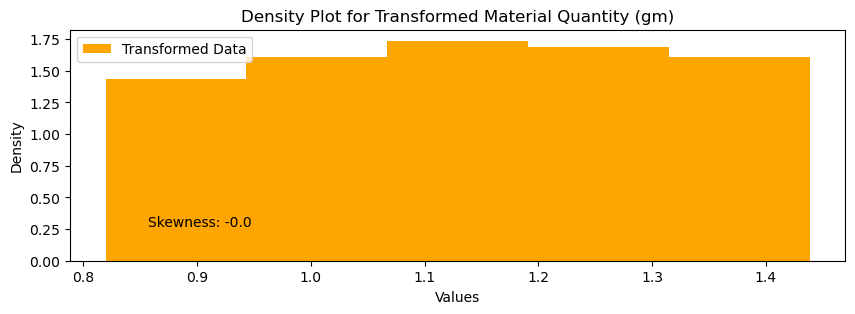

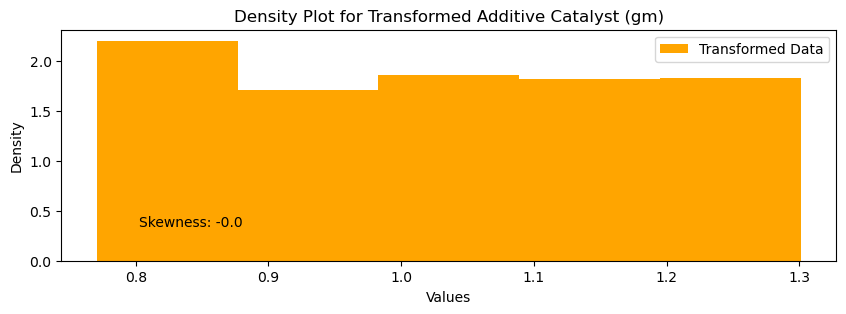

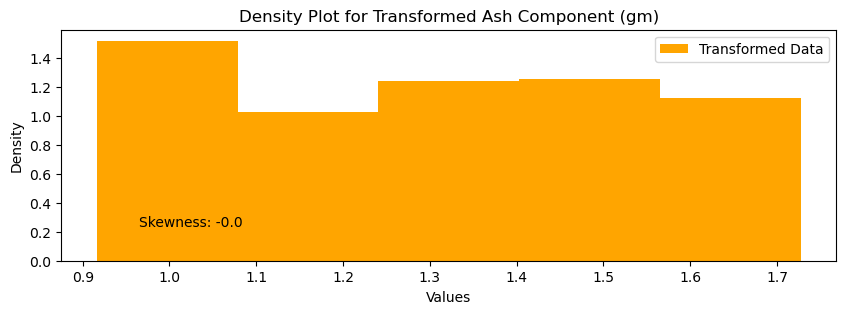

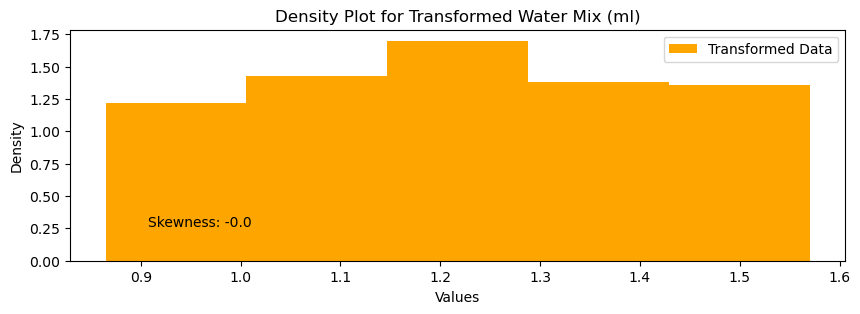

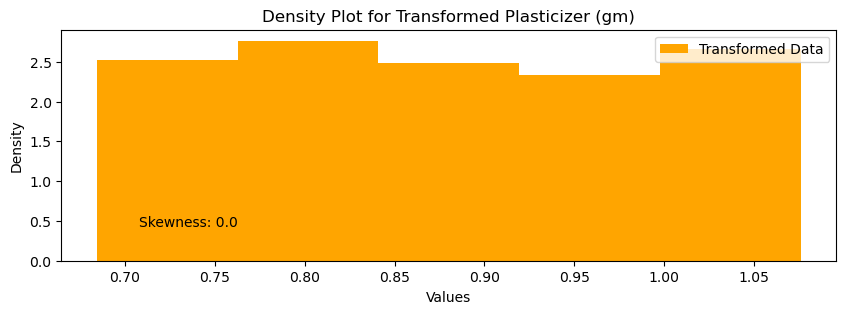

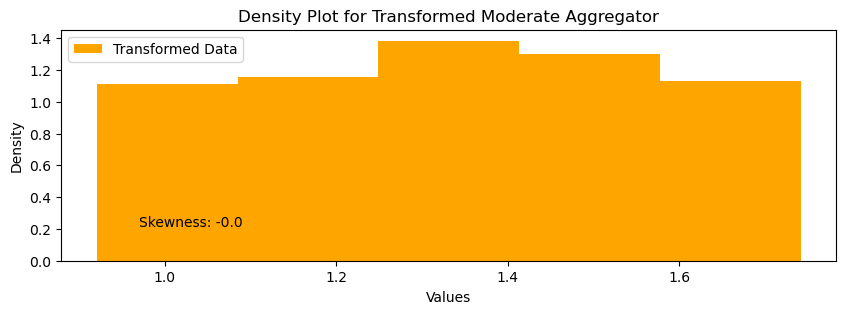

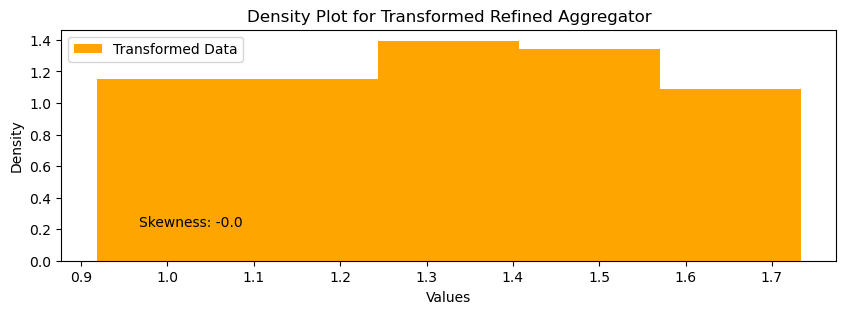

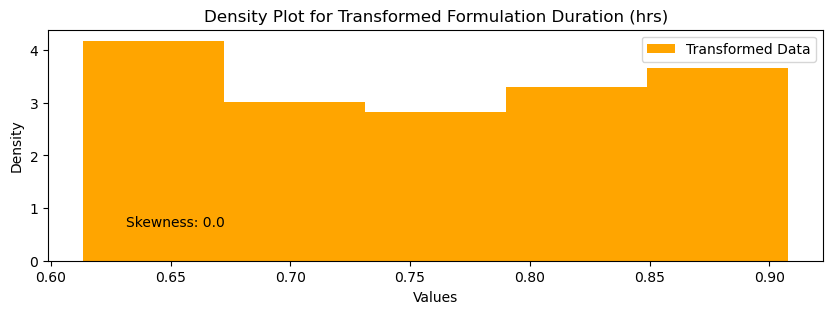

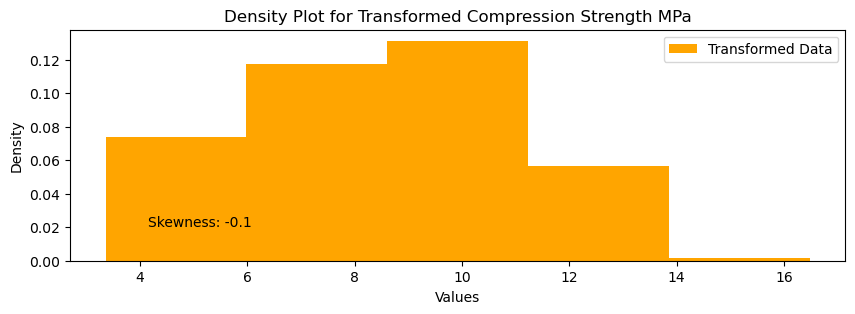

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, yeojohnson  # Import yeojohnson from scipy.stats

# Consider scaled_df as your DataFrame with columns to transform

# Create an empty DataFrame to store transformed columns
transformed_df = pd.DataFrame()

columns_to_plot = scaled_df.columns

# Loop through columns, apply Yeo-Johnson transformation, and store in transformed_df
for column in columns_to_plot:
    # Apply Yeo-Johnson transformation to the scaled data, handle zero or negative values by adding 1
    transformed_data, lambda_value = yeojohnson(scaled_df[column] + 1)
    transformed_df[column] = transformed_data  # Store transformed column in transformed_df

    # Create density plot for each transformed column
    plt.figure(figsize=(10, 3))  # Setting the size of the plot
    plt.hist(transformed_data, bins=5, density=True, alpha=1, color='orange', label='Transformed Data')  # Creating a histogram
    plt.title(f'Density Plot for Transformed {column}')  # Setting the plot title
    plt.xlabel('Values')  # Labeling x-axis
    plt.ylabel('Density')  # Labeling y-axis
    plt.legend()  # Displaying legend

    # Calculate skewness and annotate the plot with skewness value
    skewness = skew(transformed_data)  # Calculating skewness of the transformed data
    plt.annotate(f"Skewness: {skewness:.1f}", xy=(0, 0), xytext=(0.1, 0.15),
                 xycoords='axes fraction', textcoords='axes fraction')  # Annotating the plot with skewness value

# Display the transformed DataFrame
transformed_df

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\5518787.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(transformed_df[column], shade=False)  # Creating a density plot


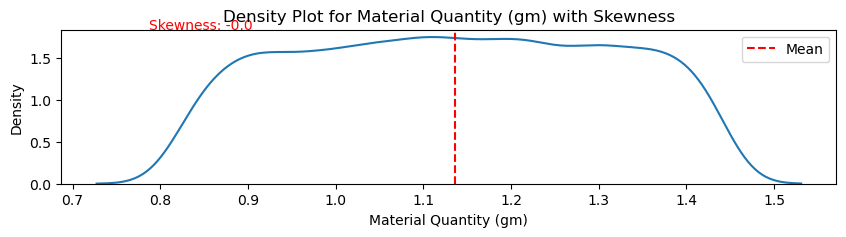

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\5518787.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(transformed_df[column], shade=False)  # Creating a density plot


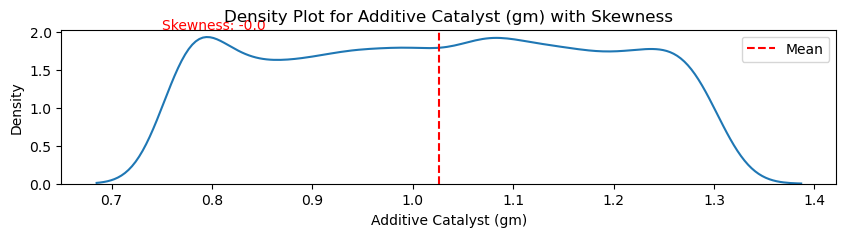

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\5518787.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(transformed_df[column], shade=False)  # Creating a density plot


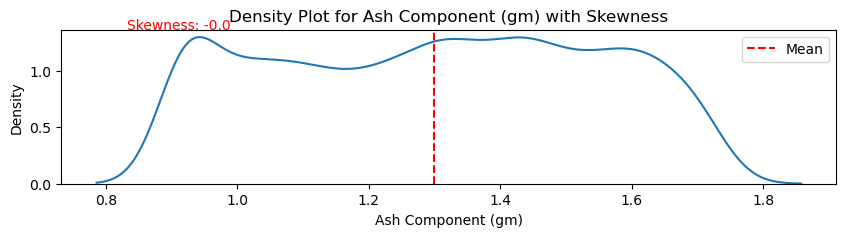

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\5518787.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(transformed_df[column], shade=False)  # Creating a density plot


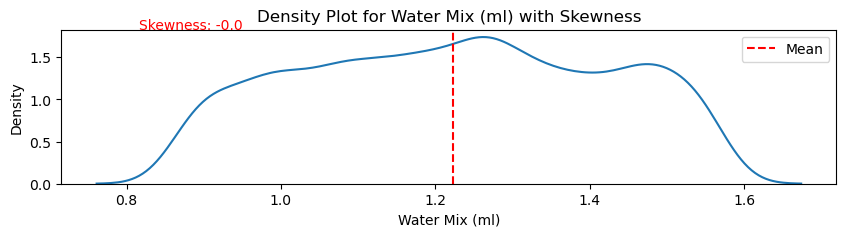

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\5518787.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(transformed_df[column], shade=False)  # Creating a density plot


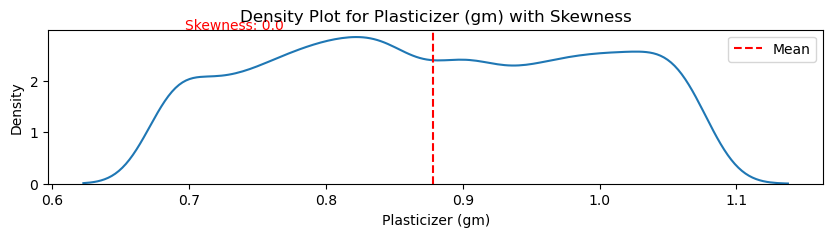

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\5518787.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(transformed_df[column], shade=False)  # Creating a density plot


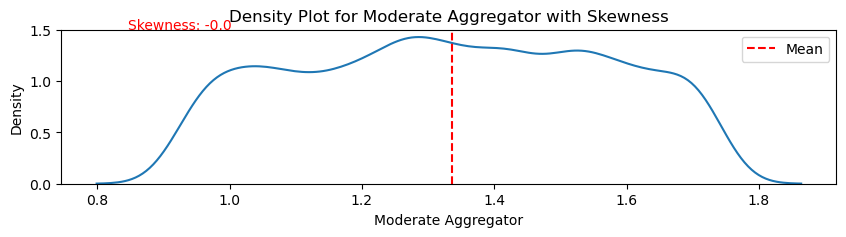

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\5518787.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(transformed_df[column], shade=False)  # Creating a density plot


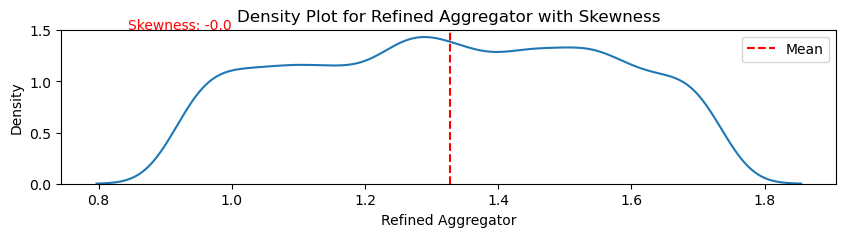

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\5518787.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(transformed_df[column], shade=False)  # Creating a density plot


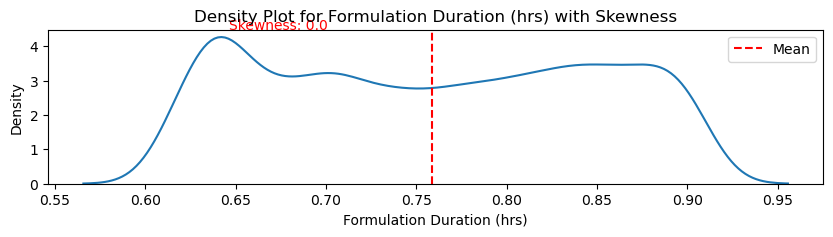

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_21012\5518787.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(transformed_df[column], shade=False)  # Creating a density plot


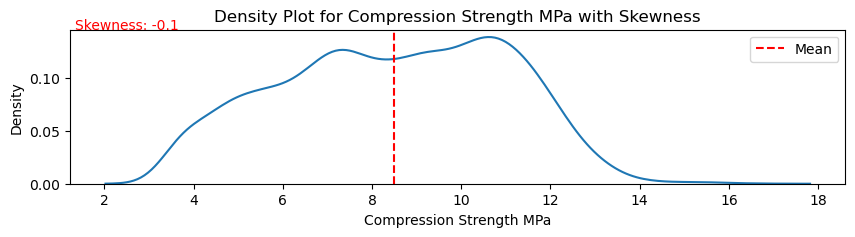

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Consider df as your DataFrame with 9 columns to visualize

columns_to_plot = transformed_df.columns[:9]  # Assuming you want to visualize the first 9 columns

# Loop through each column for visualization
for column in columns_to_plot:
    skewness_value = transformed_df[column].skew()

    # Create a density plot to visualize the distribution
    plt.figure(figsize=(10, 2))  # Setting the size of the plot
    sns.kdeplot(transformed_df[column], shade=False)  # Creating a density plot
    plt.title(f'Density Plot for {column} with Skewness')  # Setting the plot title
    plt.xlabel(column)  # Labeling x-axis
    plt.ylabel('Density')  # Labeling y-axis

    # Mark skewness value on the plot
    plt.text(plt.xlim()[0] + 0.1, plt.ylim()[1] - 0.00000005, f'Skewness: {skewness_value:.1f}', fontsize=10, color='red')  # Adding skewness value as text on the plot
    plt.axvline(x=transformed_df[column].mean(), color='red', linestyle='--', label='Mean')  # Plotting a dashed line for the mean

    plt.legend()  # Displaying legend
    plt.show()  # Displaying the plot

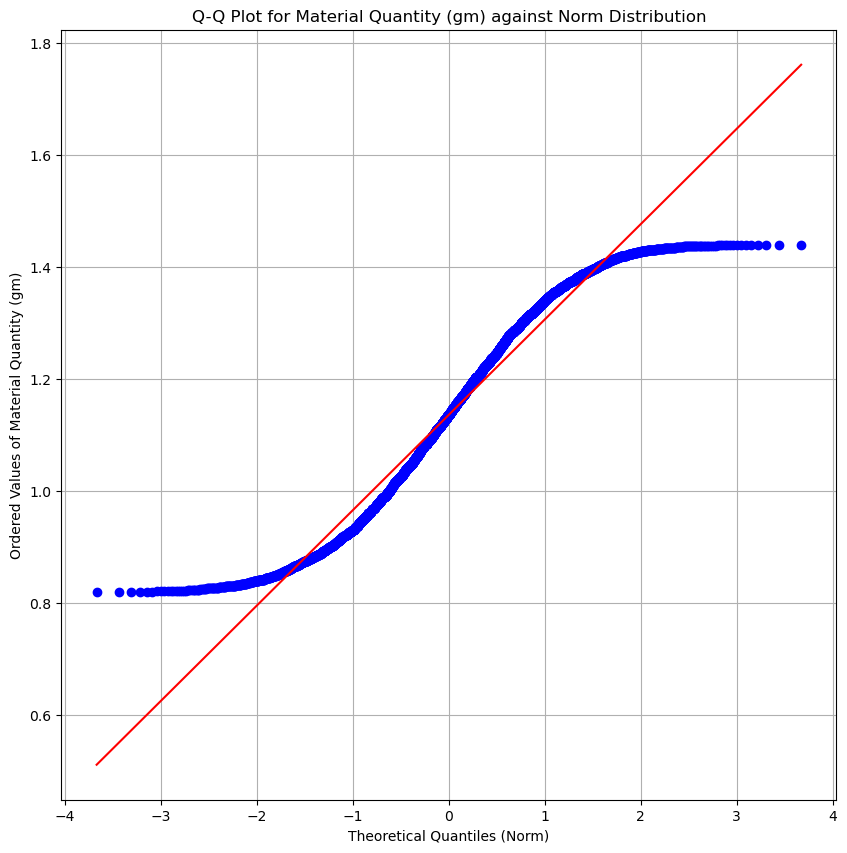

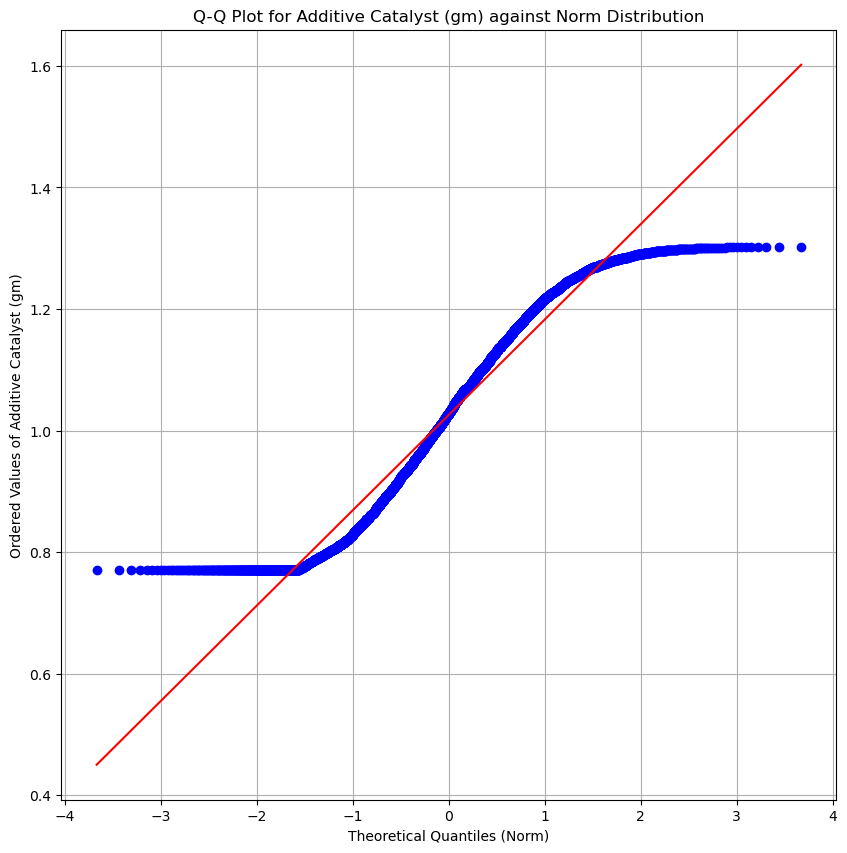

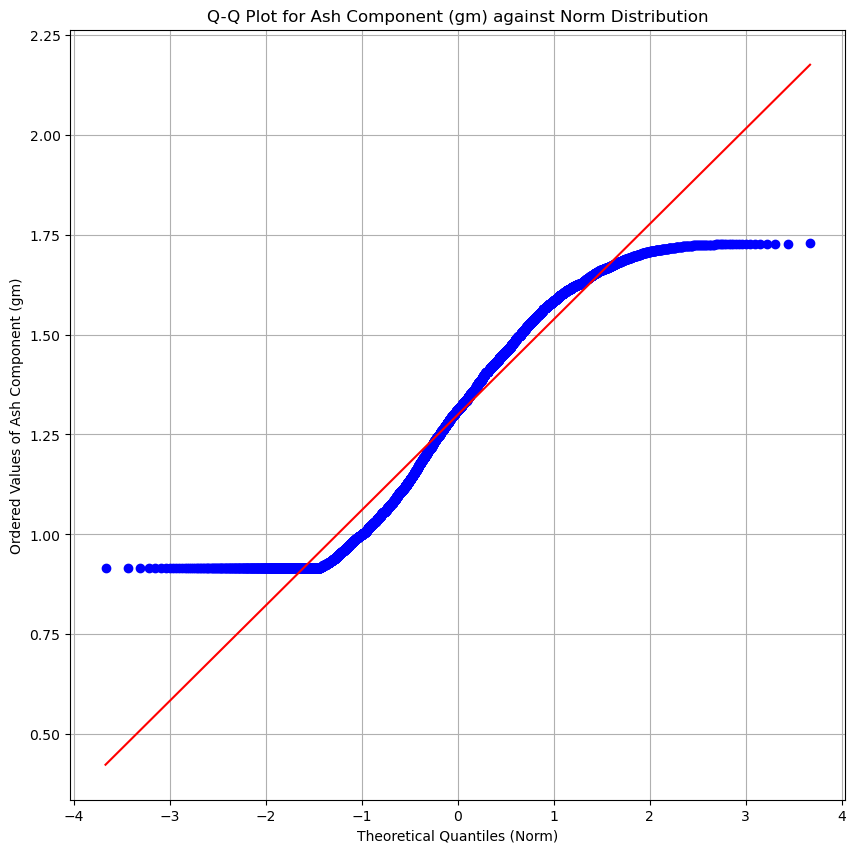

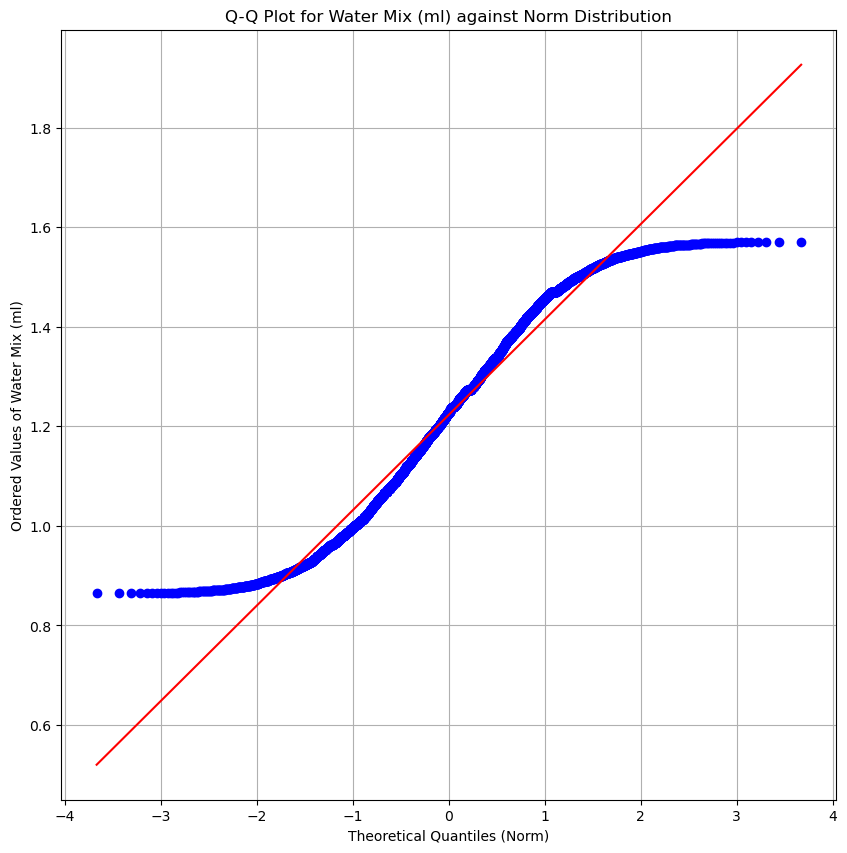

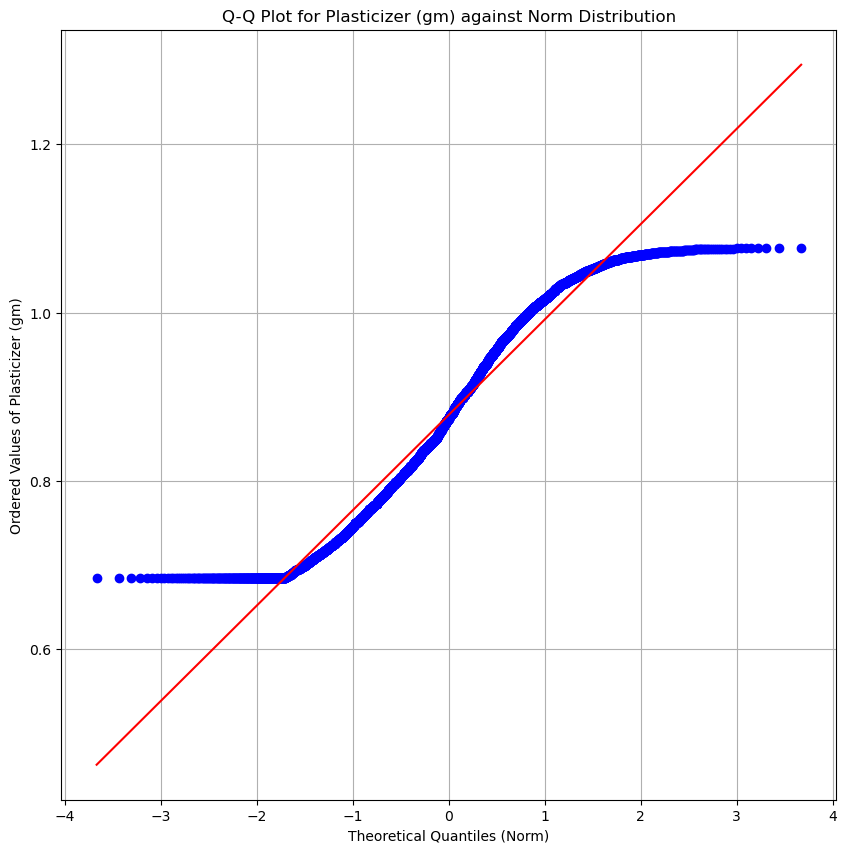

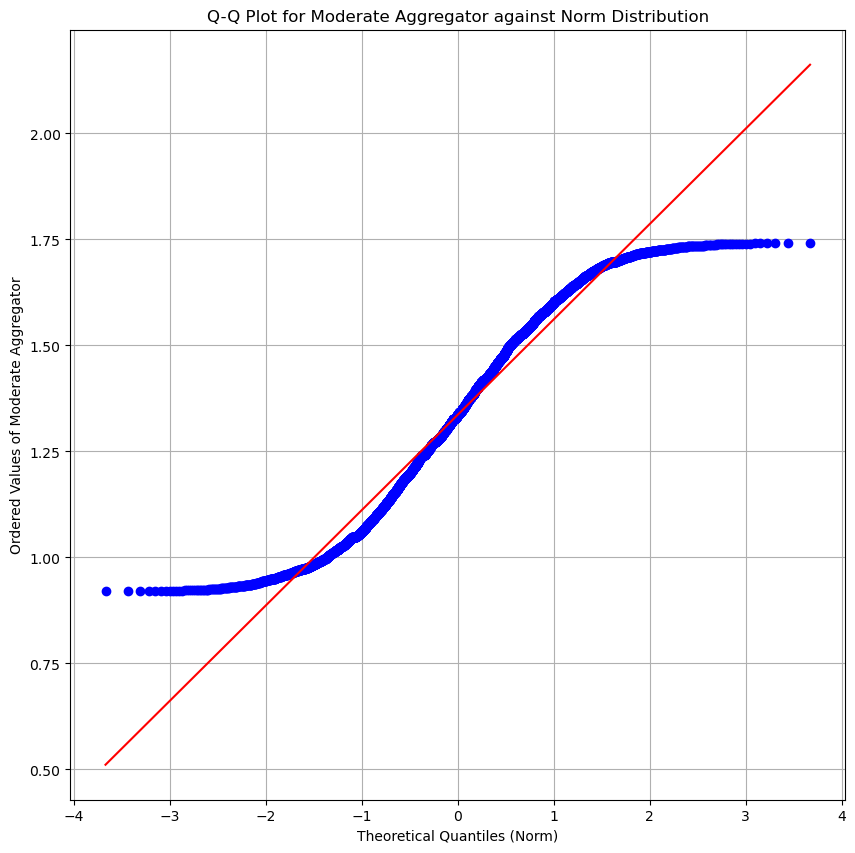

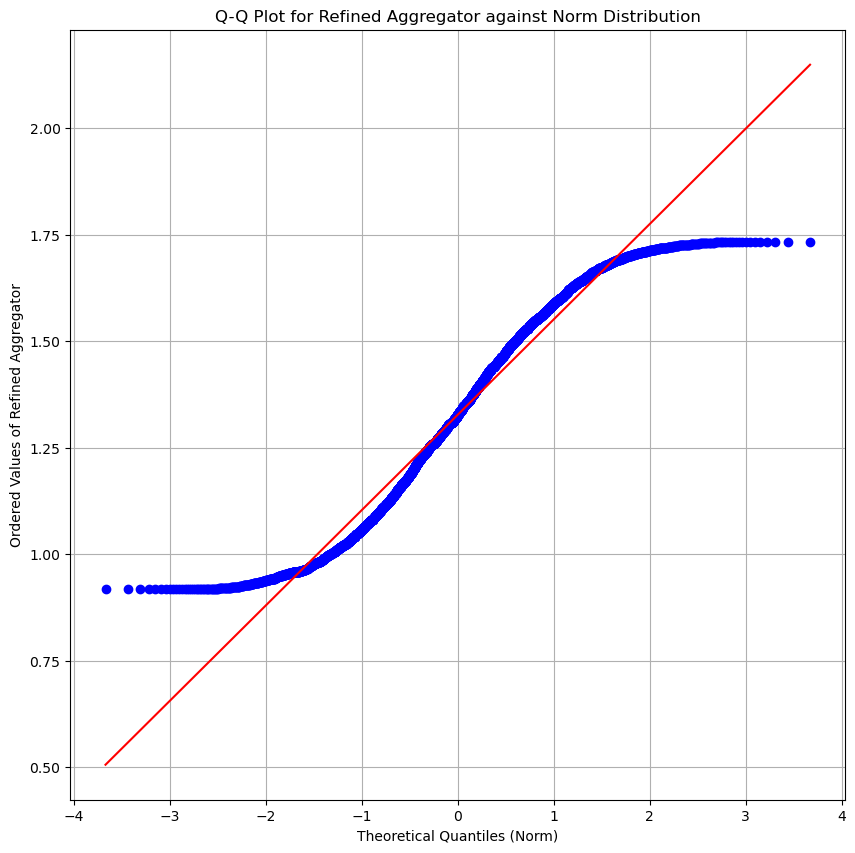

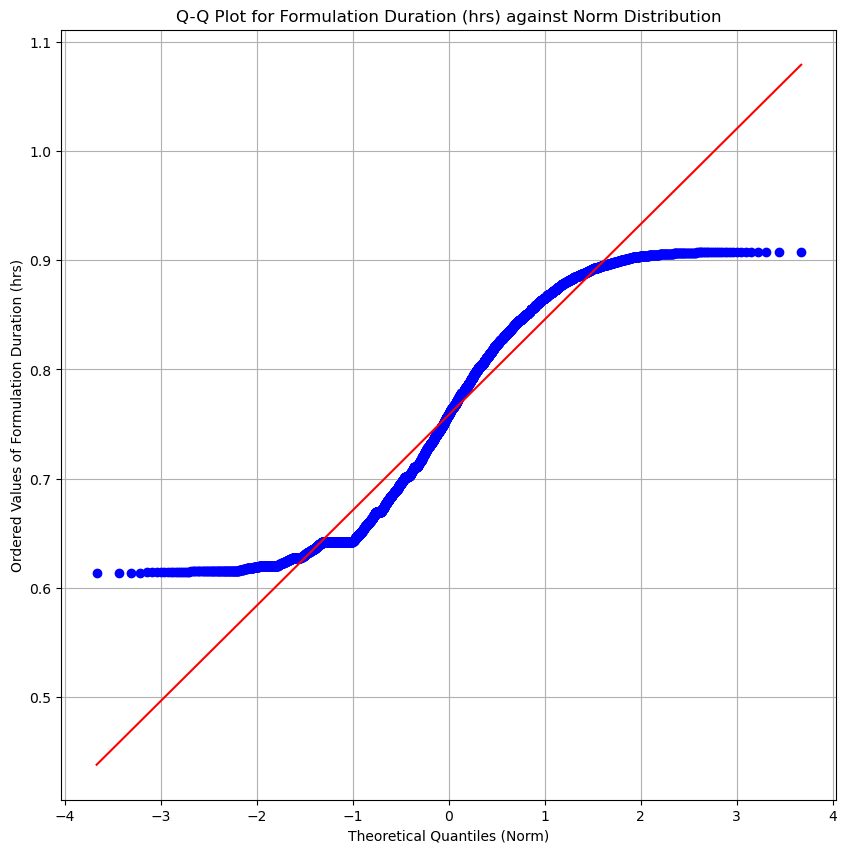

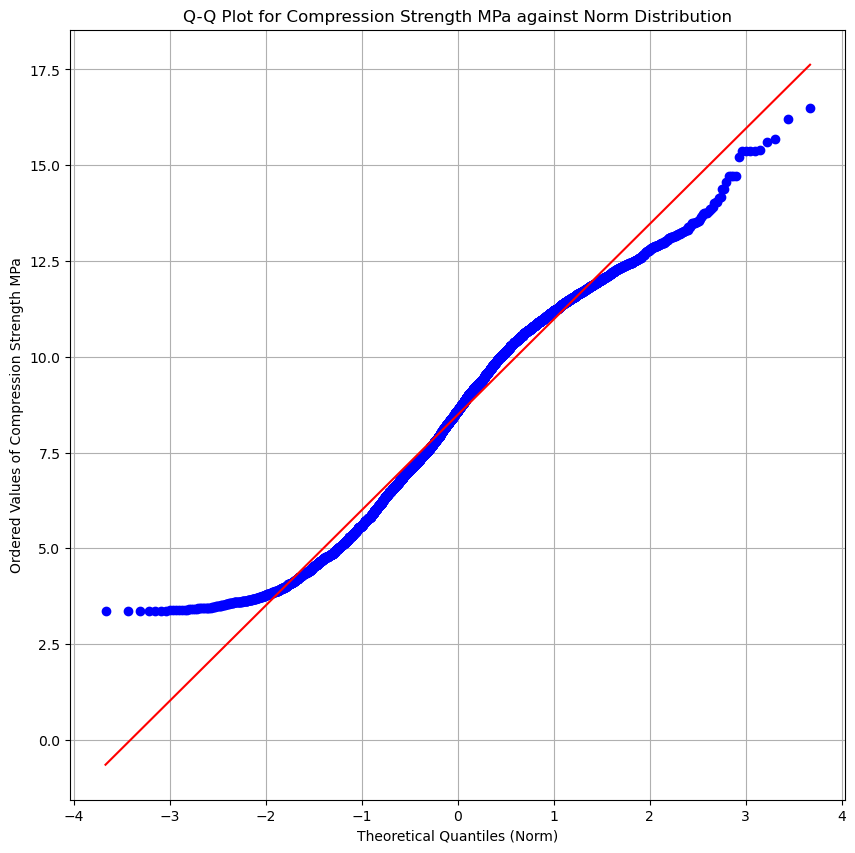

In [49]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Assuming df contains your DataFrame with 8 columns

# Selecting 8 columns for Q-Q plots
columns_for_qq = ['Material Quantity (gm)', 'Additive Catalyst (gm)', 'Ash Component (gm)', 'Water Mix (ml)', 'Plasticizer (gm)', 'Moderate Aggregator', 'Refined Aggregator', 'Formulation Duration (hrs)', 'Compression Strength MPa']

# Define the reference distribution (e.g., 'norm' for normal distribution)
reference_distribution = 'norm'

# Loop through each column for Q-Q plots
for col in columns_for_qq:
    plt.figure(figsize=(10, 10))  # Setting the size of the plot
    stats.probplot(transformed_df[col], dist=reference_distribution, plot=plt)  # Creating a Q-Q plot
    
    # Setting plot title, x-axis label, y-axis label, and gridlines
    plt.title(f'Q-Q Plot for {col} against {reference_distribution.capitalize()} Distribution')  # Setting the plot title
    plt.xlabel(f'Theoretical Quantiles ({reference_distribution.capitalize()})')  # Labeling x-axis
    plt.ylabel(f'Ordered Values of {col}')  # Labeling y-axis
    plt.grid(True)  # Showing gridlines
    plt.show()  # Displaying the Q-Q plot

In [50]:
transformed_df

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
0                   1.252936                1.007700            0.990033   
1                   0.831100                1.103188            1.540396   
2                   1.333583                0.774508            1.297448   
3                   1.145460                1.206764            1.178665   
4                   1.149318                1.208493            1.568768   
...                      ...                     ...                 ...   
5754                0.901752                0.985024            1.399873   
5755                1.097167                1.139494            1.183500   
5756                1.107016                0.802113            0.978701   
5757                1.206833                1.121190            1.518483   
5758                1.333865                1.110689            1.480259   

      Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  \
0           1.122565          0.865282             1.690419   
1           0.999746          0.758888             1.553453   
2           1.544163          0.821772             1.402997   
3           1.561008          0.894357             1.653775   
4           1.279611          0.874535             1.570888   
...              ...               ...                  ...   
5754        0.939463          0.863953             1.354117   
5755        1.058890          0.959571             1.169556   
5756        1.155090          1.039930             1.531816   
5757        1.075659          0.885099             1.026391   
5758        0.997319          0.807530             1.723378   

      Refined Aggregator  Formulation Duration (hrs)  Compression Strength MPa  
0               1.123154                    0.885135                 12.907641  
1               1.718907                    0.626929                  8.412876  
2               1.329233                    0.811050                 12.389394  
3               1.468992                    0.789044                 10.917495  
4               1.269878                    0.832372                 11.944993  
...                  ...                         ...                       ...  
5754            1.703998                    0.893765                  6.786939  
5755            1.709443                    0.700702                  7.399670  
5756            1.292782                    0.857480                  7.813034  
5757            1.373792                    0.904267                  8.113651  
5758            1.494856                    0.895697                  8.253833  

[5759 rows x 9 columns]

In [51]:
transformed_df.corr()

Material Quantity (gm)  Additive Catalyst (gm)  \
Material Quantity (gm)                    1.000000               -0.015682   
Additive Catalyst (gm)                   -0.015682                1.000000   
Ash Component (gm)                       -0.034941                0.047340   
Water Mix (ml)                            0.004290                0.027720   
Plasticizer (gm)                          0.017790                0.115940   
Moderate Aggregator                      -0.004577               -0.012289   
Refined Aggregator                       -0.014123                0.016538   
Formulation Duration (hrs)                0.027581                0.132532   
Compression Strength MPa                  0.064845                0.114001   

                            Ash Component (gm)  Water Mix (ml)  \
Material Quantity (gm)               -0.034941        0.004290   
Additive Catalyst (gm)                0.047340        0.027720   
Ash Component (gm)                    1.000000        0.002065   
Water Mix (ml)                        0.002065        1.000000   
Plasticizer (gm)                      0.133625       -0.025705   
Moderate Aggregator                   0.006991       -0.027221   
Refined Aggregator                    0.042731       -0.055432   
Formulation Duration (hrs)            0.088957        0.034457   
Compression Strength MPa              0.038462       -0.024518   

                            Plasticizer (gm)  Moderate Aggregator  \
Material Quantity (gm)              0.017790            -0.004577   
Additive Catalyst (gm)              0.115940            -0.012289   
Ash Component (gm)                  0.133625             0.006991   
Water Mix (ml)                     -0.025705            -0.027221   
Plasticizer (gm)                    1.000000            -0.007917   
Moderate Aggregator                -0.007917             1.000000   
Refined Aggregator                  0.062087            -0.002604   
Formulation Duration (hrs)          0.113858             0.025887   
Compression Strength MPa            0.120303            -0.004600   

                            Refined Aggregator  Formulation Duration (hrs)  \
Material Quantity (gm)               -0.014123                    0.027581   
Additive Catalyst (gm)                0.016538                    0.132532   
Ash Component (gm)                    0.042731                    0.088957   
Water Mix (ml)                       -0.055432                    0.034457   
Plasticizer (gm)                      0.062087                    0.113858   
Moderate Aggregator                  -0.002604                    0.025887   
Refined Aggregator                    1.000000                    0.013182   
Formulation Duration (hrs)            0.013182                    1.000000   
Compression Strength MPa              0.001436                    0.169460   

                            Compression Strength MPa  
Material Quantity (gm)                      0.064845  
Additive Catalyst (gm)                      0.114001  
Ash Component (gm)                          0.038462  
Water Mix (ml)                             -0.024518  
Plasticizer (gm)                            0.120303  
Moderate Aggregator                        -0.004600  
Refined Aggregator                          0.001436  
Formulation Duration (hrs)                  0.169460  
Compression Strength MPa                    1.000000

In [52]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5759 entries, 0 to 5758
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Material Quantity (gm)      5759 non-null   float64
 1   Additive Catalyst (gm)      5759 non-null   float64
 2   Ash Component (gm)          5759 non-null   float64
 3   Water Mix (ml)              5759 non-null   float64
 4   Plasticizer (gm)            5759 non-null   float64
 5   Moderate Aggregator         5759 non-null   float64
 6   Refined Aggregator          5759 non-null   float64
 7   Formulation Duration (hrs)  5759 non-null   float64
 8   Compression Strength MPa    5759 non-null   float64
dtypes: float64(9)
memory usage: 405.1 KB


In [53]:
transformed_df.describe()

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
count             5759.000000             5759.000000         5759.000000   
mean                 1.136142                1.025983            1.299419   
std                  0.173473                0.160789            0.244576   
min                  0.819611                0.770525            0.916053   
25%                  0.989082                0.887334            1.081056   
50%                  1.135845                1.028399            1.311411   
75%                  1.284749                1.163317            1.505944   
max                  1.438731                1.301417            1.727834   

       Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  \
count     5759.000000       5759.000000          5759.000000   
mean         1.223349          0.878493             1.336611   
std          0.194765          0.115870             0.228871   
min          0.864611          0.684186             0.920689   
25%          1.065682          0.783246             1.148594   
50%          1.227925          0.874535             1.336039   
75%          1.384691          0.980977             1.527472   
max          1.570462          1.076215             1.742369   

       Refined Aggregator  Formulation Duration (hrs)  \
count         5759.000000                 5759.000000   
mean             1.327586                    0.758526   
std              0.227852                    0.090141   
min              0.917969                    0.613592   
25%              1.135687                    0.674340   
50%              1.327159                    0.758994   
75%              1.520592                    0.839571   
max              1.733833                    0.907747   

       Compression Strength MPa  
count               5759.000000  
mean                   8.487048  
std                    2.512505  
min                    3.360801  
25%                    6.565330  
50%                    8.595363  
75%                   10.552175  
max                   16.487132

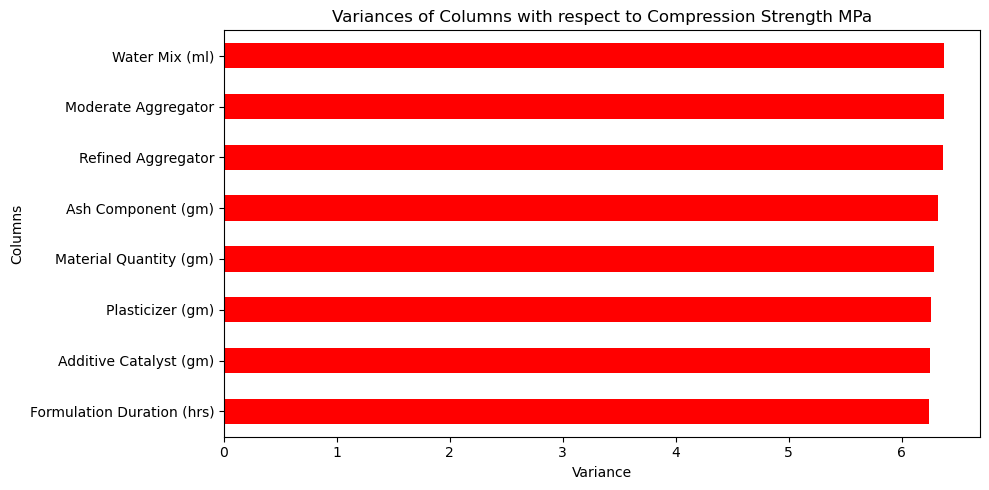

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

reference_column = 'Compression Strength MPa'

# Calculate variances of columns with respect to the reference column
variances = {}
for col in transformed_df.columns:
    if col != reference_column:
        variances[col] = transformed_df[col].sub(transformed_df['Compression Strength MPa']).var()

variances_series = pd.Series(variances)

# Plotting variances of columns with respect to the reference column
plt.figure(figsize=(10, 5))  # Setting the size of the plot
variances_series.sort_values().plot(kind='barh', color='red')  # Creating a horizontal bar plot
plt.title(f'Variances of Columns with respect to {reference_column}')  # Setting the plot title
plt.xlabel('Variance')  # Labeling x-axis
plt.ylabel('Columns')  # Labeling y-axis
plt.tight_layout()  # Adjusting layout
plt.show()  # Displaying the plot

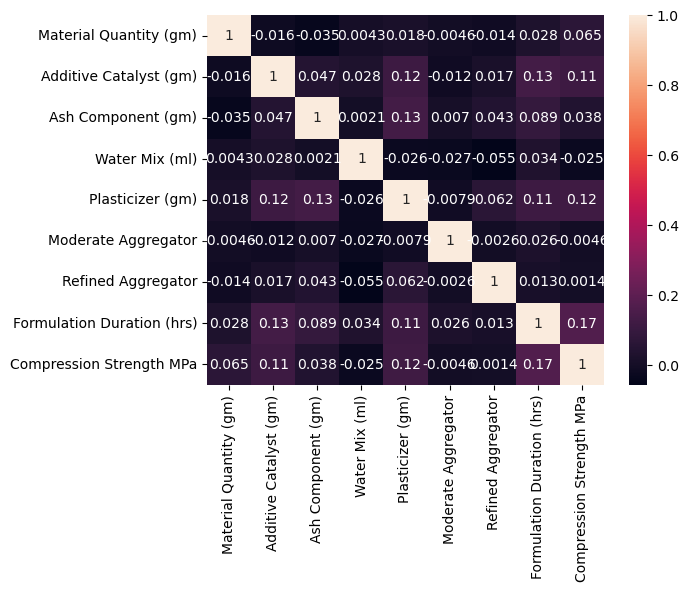

In [55]:
sns.heatmap(transformed_df.corr(), annot = True)
plt.show()

In [56]:
transformed_df.corr()

Material Quantity (gm)  Additive Catalyst (gm)  \
Material Quantity (gm)                    1.000000               -0.015682   
Additive Catalyst (gm)                   -0.015682                1.000000   
Ash Component (gm)                       -0.034941                0.047340   
Water Mix (ml)                            0.004290                0.027720   
Plasticizer (gm)                          0.017790                0.115940   
Moderate Aggregator                      -0.004577               -0.012289   
Refined Aggregator                       -0.014123                0.016538   
Formulation Duration (hrs)                0.027581                0.132532   
Compression Strength MPa                  0.064845                0.114001   

                            Ash Component (gm)  Water Mix (ml)  \
Material Quantity (gm)               -0.034941        0.004290   
Additive Catalyst (gm)                0.047340        0.027720   
Ash Component (gm)                    1.000000        0.002065   
Water Mix (ml)                        0.002065        1.000000   
Plasticizer (gm)                      0.133625       -0.025705   
Moderate Aggregator                   0.006991       -0.027221   
Refined Aggregator                    0.042731       -0.055432   
Formulation Duration (hrs)            0.088957        0.034457   
Compression Strength MPa              0.038462       -0.024518   

                            Plasticizer (gm)  Moderate Aggregator  \
Material Quantity (gm)              0.017790            -0.004577   
Additive Catalyst (gm)              0.115940            -0.012289   
Ash Component (gm)                  0.133625             0.006991   
Water Mix (ml)                     -0.025705            -0.027221   
Plasticizer (gm)                    1.000000            -0.007917   
Moderate Aggregator                -0.007917             1.000000   
Refined Aggregator                  0.062087            -0.002604   
Formulation Duration (hrs)          0.113858             0.025887   
Compression Strength MPa            0.120303            -0.004600   

                            Refined Aggregator  Formulation Duration (hrs)  \
Material Quantity (gm)               -0.014123                    0.027581   
Additive Catalyst (gm)                0.016538                    0.132532   
Ash Component (gm)                    0.042731                    0.088957   
Water Mix (ml)                       -0.055432                    0.034457   
Plasticizer (gm)                      0.062087                    0.113858   
Moderate Aggregator                  -0.002604                    0.025887   
Refined Aggregator                    1.000000                    0.013182   
Formulation Duration (hrs)            0.013182                    1.000000   
Compression Strength MPa              0.001436                    0.169460   

                            Compression Strength MPa  
Material Quantity (gm)                      0.064845  
Additive Catalyst (gm)                      0.114001  
Ash Component (gm)                          0.038462  
Water Mix (ml)                             -0.024518  
Plasticizer (gm)                            0.120303  
Moderate Aggregator                        -0.004600  
Refined Aggregator                          0.001436  
Formulation Duration (hrs)                  0.169460  
Compression Strength MPa                    1.000000

In [57]:
from joblib import Parallel, delayed

# Function to perform bootstrap sampling
def bootstrap_sample(df):
    return df.sample(n=len(df), replace=True)

# Number of bootstrap samples
num_bootstrap_samples = 10

# Parallel bootstrapping
bootstrapped_data_list = Parallel(n_jobs=-1)(delayed(bootstrap_sample)(transformed_df) for _ in range(num_bootstrap_samples))

# Concatenate bootstrapped samples into a single DataFrame
bootstrapped_data = pd.concat(bootstrapped_data_list, ignore_index=True)

# Explanation of the code:

# 'bootstrap_sample' is a function that performs bootstrap sampling by resampling the DataFrame 'df' with replacement.

# 'num_bootstrap_samples' specifies the number of bootstrap samples to generate.

# Using joblib's Parallel and delayed functions to perform parallel bootstrapping, generating 'num_bootstrap_samples' bootstrapped datasets.

# 'bootstrapped_data_list' stores each bootstrapped sample generated.

# 'pd.concat' concatenates all the bootstrapped samples stored in 'bootstrapped_data_list' into a single DataFrame 'bootstrapped_data'.

In [58]:
bootstrapped_data

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
0                    1.271569                1.063620            1.646581   
1                    0.949789                0.915804            1.646967   
2                    1.134411                1.003138            0.916053   
3                    1.026082                1.088959            1.678393   
4                    1.115214                1.244218            1.583230   
...                       ...                     ...                 ...   
57585                1.102423                0.906771            0.963079   
57586                1.365406                1.037585            1.492996   
57587                1.041564                1.023582            1.534289   
57588                1.036038                0.798123            1.219084   
57589                0.889391                0.897275            1.127846   

       Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  \
0            1.471225          0.949823             1.146955   
1            1.136695          0.860775             1.575861   
2            1.195090          0.798024             1.409370   
3            1.502085          0.830192             0.977939   
4            1.549080          0.971225             1.625797   
...               ...               ...                  ...   
57585        0.980383          0.929159             1.355834   
57586        1.309136          0.877162             1.457675   
57587        1.131802          0.872205             1.301133   
57588        1.553131          0.847850             1.631737   
57589        1.118884          1.073115             1.707359   

       Refined Aggregator  Formulation Duration (hrs)  \
0                1.120970                    0.854875   
1                1.212829                    0.826240   
2                1.119418                    0.641788   
3                1.593656                    0.876399   
4                1.210203                    0.679024   
...                   ...                         ...   
57585            1.638782                    0.885761   
57586            1.258293                    0.802660   
57587            1.254575                    0.872435   
57588            1.034074                    0.767241   
57589            1.461645                    0.683819   

       Compression Strength MPa  
0                      6.777125  
1                      6.294405  
2                      6.058611  
3                      8.996747  
4                      7.905654  
...                         ...  
57585                  8.212535  
57586                  8.680833  
57587                 12.500427  
57588                  7.916602  
57589                 10.585835  

[57590 rows x 9 columns]

In [59]:
bootstrapped_data.corr()

Material Quantity (gm)  Additive Catalyst (gm)  \
Material Quantity (gm)                    1.000000               -0.023061   
Additive Catalyst (gm)                   -0.023061                1.000000   
Ash Component (gm)                       -0.036261                0.049290   
Water Mix (ml)                            0.003182                0.023831   
Plasticizer (gm)                          0.011379                0.112230   
Moderate Aggregator                      -0.006211               -0.010026   
Refined Aggregator                       -0.005206                0.012443   
Formulation Duration (hrs)                0.020689                0.136113   
Compression Strength MPa                  0.067001                0.109856   

                            Ash Component (gm)  Water Mix (ml)  \
Material Quantity (gm)               -0.036261        0.003182   
Additive Catalyst (gm)                0.049290        0.023831   
Ash Component (gm)                    1.000000        0.004024   
Water Mix (ml)                        0.004024        1.000000   
Plasticizer (gm)                      0.129375       -0.031038   
Moderate Aggregator                   0.013182       -0.032365   
Refined Aggregator                    0.038124       -0.051682   
Formulation Duration (hrs)            0.085499        0.034765   
Compression Strength MPa              0.033936       -0.023364   

                            Plasticizer (gm)  Moderate Aggregator  \
Material Quantity (gm)              0.011379            -0.006211   
Additive Catalyst (gm)              0.112230            -0.010026   
Ash Component (gm)                  0.129375             0.013182   
Water Mix (ml)                     -0.031038            -0.032365   
Plasticizer (gm)                    1.000000            -0.006481   
Moderate Aggregator                -0.006481             1.000000   
Refined Aggregator                  0.067593            -0.006473   
Formulation Duration (hrs)          0.109330             0.030407   
Compression Strength MPa            0.121006             0.001290   

                            Refined Aggregator  Formulation Duration (hrs)  \
Material Quantity (gm)               -0.005206                    0.020689   
Additive Catalyst (gm)                0.012443                    0.136113   
Ash Component (gm)                    0.038124                    0.085499   
Water Mix (ml)                       -0.051682                    0.034765   
Plasticizer (gm)                      0.067593                    0.109330   
Moderate Aggregator                  -0.006473                    0.030407   
Refined Aggregator                    1.000000                    0.015072   
Formulation Duration (hrs)            0.015072                    1.000000   
Compression Strength MPa             -0.000136                    0.162901   

                            Compression Strength MPa  
Material Quantity (gm)                      0.067001  
Additive Catalyst (gm)                      0.109856  
Ash Component (gm)                          0.033936  
Water Mix (ml)                             -0.023364  
Plasticizer (gm)                            0.121006  
Moderate Aggregator                         0.001290  
Refined Aggregator                         -0.000136  
Formulation Duration (hrs)                  0.162901  
Compression Strength MPa                    1.000000

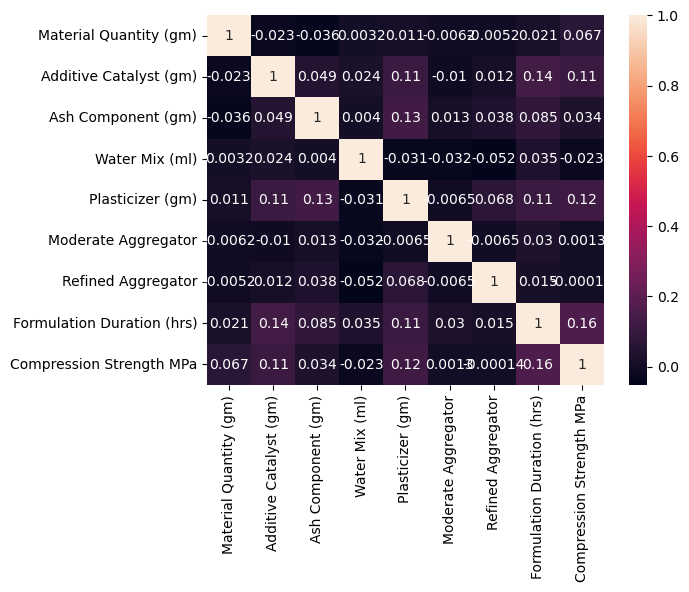

In [60]:
sns.heatmap(bootstrapped_data.corr(), annot = True)
plt.show()

In [61]:
# Selecting specific columns from the bootstrapped dataset for analysis
X = bootstrapped_data[['Formulation Duration (hrs)', 'Additive Catalyst (gm)', 'Plasticizer (gm)']]

# Explanation of the code:

# 'bootstrapped_data' is assumed to be a DataFrame containing bootstrapped samples.

# 'X' is created as a subset DataFrame, containing specific columns:
# - 'Formulation Duration (hrs)'
# - 'Additive Catalyst (gm)'
# - 'Plasticizer (gm)'
# These columns are selected for further analysis or modeling purposes.

In [62]:
X

Formulation Duration (hrs)  Additive Catalyst (gm)  Plasticizer (gm)
0                        0.854875                1.063620          0.949823
1                        0.826240                0.915804          0.860775
2                        0.641788                1.003138          0.798024
3                        0.876399                1.088959          0.830192
4                        0.679024                1.244218          0.971225
...                           ...                     ...               ...
57585                    0.885761                0.906771          0.929159
57586                    0.802660                1.037585          0.877162
57587                    0.872435                1.023582          0.872205
57588                    0.767241                0.798123          0.847850
57589                    0.683819                0.897275          1.073115

[57590 rows x 3 columns]

In [63]:
# Accessing the 'Compression Strength MPa' column from the 'bootstrapped_data' DataFrame
y = bootstrapped_data['Compression Strength MPa']

In [64]:
y

0         6.777125
1         6.294405
2         6.058611
3         8.996747
4         7.905654
           ...    
57585     8.212535
57586     8.680833
57587    12.500427
57588     7.916602
57589    10.585835
Name: Compression Strength MPa, Length: 57590, dtype: float64

In [65]:
# Importing the train_test_split function from the sklearn library
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
# X: input features, y: target variable
# test_size=0.2 specifies that 20% of the data will be used for testing
# random_state=42 sets a seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
X_train

Formulation Duration (hrs)  Additive Catalyst (gm)  Plasticizer (gm)
25296                    0.878196                0.799449          1.068611
29234                    0.792381                1.161115          0.730166
4293                     0.736683                0.939178          0.879178
12692                    0.816906                1.011883          0.961047
23269                    0.641788                0.770525          0.821879
...                           ...                     ...               ...
54343                    0.886875                0.967902          0.694301
38158                    0.643040                1.037112          0.986958
860                      0.660729                1.090621          0.858204
15795                    0.861901                0.941426          0.685302
56422                    0.850931                1.133869          0.693687

[46072 rows x 3 columns]

In [67]:
X_test

Formulation Duration (hrs)  Additive Catalyst (gm)  Plasticizer (gm)
45944                    0.699647                1.005272          0.772191
51126                    0.890952                0.939139          0.877768
26326                    0.799381                0.929862          0.696873
25807                    0.725641                1.120517          0.967753
12528                    0.731324                1.261888          1.053631
...                           ...                     ...               ...
40748                    0.864599                1.116220          0.975683
39646                    0.713824                0.883885          0.899986
11813                    0.866693                1.210421          1.020851
1331                     0.629872                1.149015          0.963441
23344                    0.644340                1.201732          0.892672

[11518 rows x 3 columns]

In [69]:
# Import necessary libraries and modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import randint

# Initialize and split the dataset into training and testing sets
# X_train: Training features, X_test: Testing features
# y_train: Training target variable, y_test: Testing target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model with default parameters
random_forest_model = RandomForestRegressor(random_state=42)

# Train the Random Forest Regressor model using the training data
random_forest_model.fit(X_train, y_train)

# Predict the target variable using the trained model on the test set
y_pred = random_forest_model.predict(X_test)

# Calculate and print Mean Squared Error (MSE) as an evaluation metric
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate and print R-squared (Coefficient of Determination) as an evaluation metric
r2 = r2_score(y_test, y_pred)
print("R-squared (R2 Score):", r2)

# Calculate and print Mean Absolute Error (MAE) as an evaluation metric
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error: 0.1409217297889103
R-squared (R2 Score): 0.9776898366348153
Mean Absolute Error (MAE): 0.06782778333514984


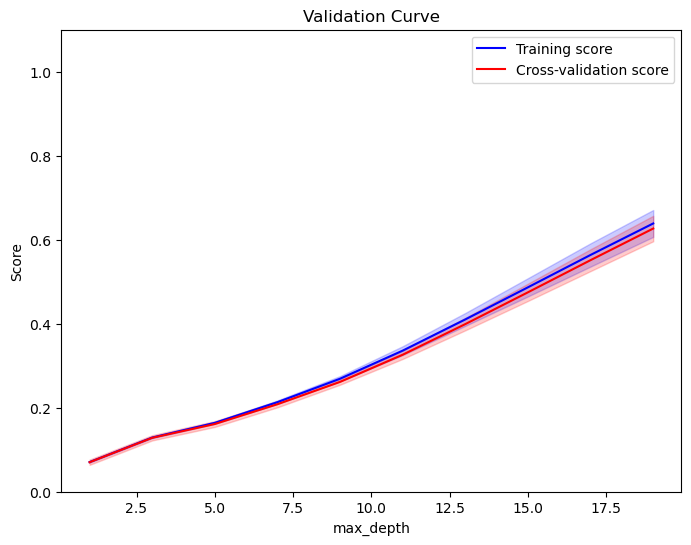

In [70]:
# Import necessary libraries and modules
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assuming you have a model 'model', features 'X', target 'y'

# Define the range of hyperparameter values to test
param_range = np.arange(1, 21, 2)  # Adjust the range based on your needs

# Calculate training and validation scores using validation curve
train_scores, valid_scores = validation_curve(
    RandomForestRegressor(random_state=42),  # Initialize RandomForestRegressor with default parameters
    X, y,
    param_name='max_depth',  # Hyperparameter being varied
    param_range=param_range,  # Range of hyperparameter values to test
    cv=5,  # Number of cross-validation folds
    scoring='r2'  # Evaluation metric (in this case, R-squared)
)

# Calculate mean and standard deviation of scores across folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plotting validation curves
plt.figure(figsize=(8, 6))
plt.title('Validation Curve')
plt.xlabel('max_depth')  # Label for the x-axis (hyperparameter being tested)
plt.ylabel('Score')  # Label for the y-axis (performance score)
plt.ylim(0.0, 1.1)  # Set the y-axis limits
plt.plot(param_range, train_mean, label='Training score', color='blue')  # Plotting training scores
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')  # Training score uncertainty
plt.plot(param_range, valid_mean, label='Cross-validation score', color='red')  # Plotting cross-validation scores
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='red')  # Cross-validation score uncertainty
plt.legend(loc='best')  # Show legend
plt.show()  # Display the plot

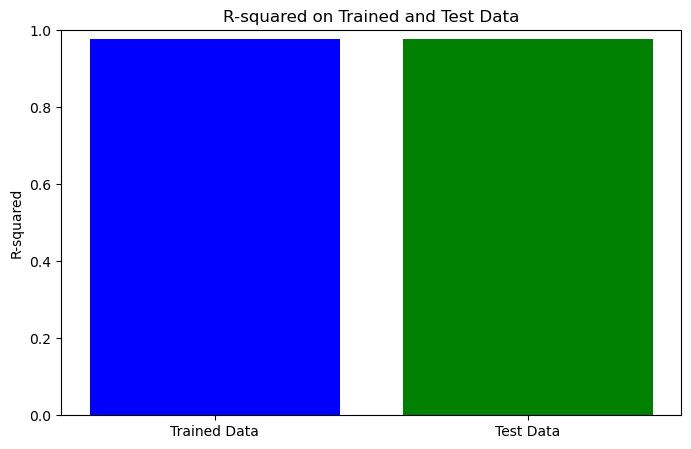

In [71]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Assuming 'random_forest_model' is a trained RandomForestRegressor model,
# 'X_train' contains the training features, 'y_train' is the training target,
# 'X_test' contains the test features, and 'y_test' is the test target.

# Calculate R-squared on the trained data
train_r2 = r2_score(y_train, random_forest_model.predict(X_train))

# Calculate R-squared on the test data
test_r2 = r2_score(y_test, random_forest_model.predict(X_test))

# Create a bar plot to display R-squared on both datasets
plt.figure(figsize=(8, 5))
plt.bar(['Trained Data', 'Test Data'], [train_r2, test_r2], color=['blue', 'green'])
plt.title('R-squared on Trained and Test Data')  # Set the title of the plot
plt.ylabel('R-squared')  # Label the y-axis as R-squared
plt.ylim(0.0, 1.0)  # Set the y-axis limits from 0 to 1
plt.show()  # Display the bar plot

In [73]:
from sklearn.metrics import r2_score

# Assuming 'reg' is your already trained regression model and X_train, y_train, X_test, y_test are your data
train_predictions = random_forest_model.predict(X_train)
test_predictions = random_forest_model.predict(X_test)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")

Training R-squared: 0.9779
Testing R-squared: 0.9777


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, and y_test are defined previously

# Define a list of models to iterate through
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
    # Add more models as needed
]

# Store results in a dictionary
results = {
    'Model': [],
    'Train MSE': [],
    'Test MSE': []
}

# Loop through each model, fit, predict, and evaluate
for model in models:
    model_name = model.__class__.__name__  # Get the name of the model
    model.fit(X_train, y_train)  # Fit the model with training data
    train_predictions = model.predict(X_train)  # Predict on training data
    test_predictions = model.predict(X_test)  # Predict on test data
    train_mse = mean_squared_error(y_train, train_predictions)  # Calculate MSE on training data
    test_mse = mean_squared_error(y_test, test_predictions)  # Calculate MSE on test data
    
    # Append model name and corresponding MSEs to the results dictionary
    results['Model'].append(model_name)
    results['Train MSE'].append(train_mse)
    results['Test MSE'].append(test_mse)

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)

                       Model  Train MSE  Test MSE
0           LinearRegression   5.985492  6.048247
1                      Ridge   5.985493  6.048231
2                      Lasso   6.259158  6.317294
3      RandomForestRegressor   0.138217  0.138762
4  GradientBoostingRegressor   4.902563  4.983244
5                        SVR   5.649131  5.739780


In [76]:
results_df

Model  Train MSE  Test MSE
0           LinearRegression   5.985492  6.048247
1                      Ridge   5.985493  6.048231
2                      Lasso   6.259158  6.317294
3      RandomForestRegressor   0.138217  0.138762
4  GradientBoostingRegressor   4.902563  4.983244
5                        SVR   5.649131  5.739780

In [75]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# Assuming 'X_train' and 'y_train' are already defined and represent your training data

# Initialize and train a RandomForestRegressor model
model = RandomForestRegressor()  # Initializing the RandomForestRegressor model
model.fit(X_train, y_train)  # Training the model with the training data

# Export the trained model to a file using pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)  # Saving the trained model to a .pkl file

In [77]:
import gzip
import pickle

# Load the already trained and exported model
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)  # Load the exported model using pickle

# Compress the loaded model file
with gzip.open('random_forest_model.pkl.gz', 'wb') as compressed_file:
    pickle.dump(loaded_model, compressed_file)  # Compress and save the model using gzip

In [80]:
# Read the CSV file containing the original data into a Pandas DataFrame
original_data = pd.read_csv("Material Compressive Strength Experimental Data.csv")

In [81]:
original_data

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
0                     486.42                  180.60               21.26   
1                     133.32                  260.14              185.60   
2                     559.97                    2.84              111.76   
3                     391.43                  351.05               76.39   
4                     394.78                  352.61              194.35   
...                      ...                     ...                 ...   
6134                  188.78                  162.30              142.65   
6135                  349.87                  291.45               77.82   
6136                  358.29                   22.70               17.99   
6137                  445.25                  275.59              178.86   
6138                  560.23                  266.56              167.14   

      Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  \
0             201.66             16.11              1151.17   
1             175.99              6.27              1090.57   
2             295.23             11.95              1024.93   
3             299.14             19.00              1134.88   
4             235.54             17.02              1098.24   
...              ...               ...                  ...   
6134          163.66             15.98              1003.82   
6135          188.26             25.82               925.10   
6136          208.58             34.91              1081.07   
6137          191.77             18.07               865.15   
6138          175.49             10.63              1165.87   

      Refined Aggregator  Formulation Duration (hrs)  Compression Strength MPa  
0                 708.50                      344.43                     79.89  
1                1010.25                       28.86                     59.80  
2                 810.69                      237.68                     77.86  
3                 881.34                      208.81                     71.74  
4                 781.01                      266.84                     76.07  
...                  ...                         ...                       ...  
6134             1002.47                      357.91                     50.61  
6135             1005.31                      104.20                     54.24  
6136              792.44                      302.76                     56.57  
6137              833.10                      374.63                     58.21  
6138              894.53                      360.96                     58.96  

[6139 rows x 9 columns]

In [82]:
# Function to remove outliers using IQR method and replace the column
def remove_outliers_replace(column, lower_multiplier=1.5, upper_multiplier=1.5):
    Q1 = column.quantile(0.25)  # Calculating the first quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Calculating the third quartile (75th percentile)
    IQR = Q3 - Q1  # Calculating the Interquartile Range (IQR)
    lower_bound = Q1 - lower_multiplier * IQR  # Calculating the lower bound
    upper_bound = Q3 + upper_multiplier * IQR  # Calculating the upper bound
    return column.apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else None)  # Applying the IQR method

# Adjusting the threshold values by modifying the multipliers
lower_threshold = 1.0  # Lower threshold multiplier
upper_threshold = 2.0  # Upper threshold multiplier

# Remove outliers from 'Compression Strength MPa' column
# Replace outliers with modified values using adjusted threshold values
original_data['Compression Strength MPa'] = remove_outliers_replace(df['Compression Strength MPa'], lower_threshold, upper_threshold)

In [85]:
original_data = original_data.dropna()

# Drop rows with missing values (NaN) from the DataFrame 'df'

In [87]:
# Specify the columns to scale
columns_to_scale = ['Formulation Duration (hrs)', 'Additive Catalyst (gm)', 'Plasticizer (gm)']

In [89]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler object for feature scaling
features_scaler = StandardScaler()

In [90]:
# Fit the StandardScaler to the specified columns for scaling and assign it to 'scaler_features_dt'
scaler_features_dt = features_scaler.fit(original_data[columns_to_scale])

In [92]:
import pickle

# Define the file path where the scaler will be saved
scaler_path = 'features_scaler.pkl'

# Open a file to write the scaler object using pickle
with open(scaler_path, 'wb') as scaler_file:
    # Dump the fitted scaler object into the file
    pickle.dump(scaler_features_dt, scaler_file)

In [93]:
# List of columns to scale
columns_to_scale = ['Compression Strength MPa']  # Column(s) to be scaled

In [94]:
# Initialize StandardScaler for scaling the target variable(s)
target_scaler = StandardScaler()  # Using StandardScaler to scale the target variable

In [95]:
# Fitting the target scaler to the specified columns in the original_data
# This step calculates the mean and standard deviation necessary for scaling
scaler_target_dt = target_scaler.fit(original_data[columns_to_scale])

In [96]:
import pickle  # Importing the pickle module

# Path to save the target scaler using pickle
scaler_path = 'target_scaler.pkl'  # File path where the scaler will be saved

# Saving the fitted scaler object to a file using pickle
with open(scaler_path, 'wb') as scaler_file:
    # 'wb' mode is used to write the scaler object in binary format
    pickle.dump(scaler_target_dt, scaler_file)
    # 'pickle.dump' writes the scaler_target_dt object to the specified file